### Directly running run_SEAWAT_MC_NM.py to reproduce hanging at Stress Per 52

In [3]:
import flopy
import os
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

if sys.platform.lower()=='linux':
    datadir = Path('/scratch/users/ianpg/SWIlarge/data')
    workdir = Path('/scratch/users/ianpg/SWIlarge/work')
    MPSdir = datadir.joinpath('lith/sgems/MPS')
    lithdir = datadir.joinpath('lith/sgems/')
    GISdir = datadir.joinpath('GIS')
    priordir = datadir.joinpath('PriorModel')
    modeldir = datadir.joinpath('NM_model')
elif sys.platform.lower()=='darwin':
    datadir = Path('../data')
    workdir = Path('../work')
    MPSdir = Path('/Users/ianpg/Dropbox/temp_convenience/SWIlarge/data/lith/sgems/MPS')
    GISdir = datadir.joinpath('GIS')
    lithdir = datadir.joinpath('lith/sgems/')
    priordir = datadir.joinpath('PriorModel')
    modeldir = datadir.joinpath('NM_model')

nmgwmdir_empty = datadir.joinpath('nmgwmdir_empty') #<-- removed everything but DIS
nmgwmdir_cal = datadir.joinpath('Calibrated_small') #<-- removed RCH, WEL, GLO, LST from the NAM file to load much faster
figdir = workdir.joinpath('figs')
outputdir = workdir.joinpath('output')

import config

system: linux


In [4]:
modelname = 'SV'
model_ws = workdir.joinpath("SV")
import shutil

for it in range(101,500):
    print(it)
    dst = model_ws.parent.joinpath(model_ws.name + '_{}'.format(it))
    if dst.exists():
        shutil.rmtree(dst)
    print('copying {} to {}'.format(model_ws,dst))
    shutil.copytree(model_ws.as_posix(),dst)

101
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_101
102
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_102
103
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_103
104
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_104
105
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_105
106
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_106
107
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_107
108
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_108
109
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_109
110
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_110
111
copying /scratch/users/ianpg/SWIlarge/work/SV 

188
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_188
189
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_189
190
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_190
191
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_191
192
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_192
193
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_193
194
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_194
195
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_195
196
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_196
197
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_197
198
copying /scratch/users/ianpg/SWIlarge/work/SV 

275
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_275
276
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_276
277
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_277
278
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_278
279
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_279
280
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_280
281
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_281
282
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_282
283
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_283
284
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_284
285
copying /scratch/users/ianpg/SWIlarge/work/SV 

362
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_362
363
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_363
364
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_364
365
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_365
366
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_366
367
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_367
368
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_368
369
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_369
370
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_370
371
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_371
372
copying /scratch/users/ianpg/SWIlarge/work/SV 

449
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_449
450
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_450
451
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_451
452
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_452
453
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_453
454
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_454
455
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_455
456
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_456
457
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_457
458
copying /scratch/users/ianpg/SWIlarge/work/SV to /scratch/users/ianpg/SWIlarge/work/SV_458
459
copying /scratch/users/ianpg/SWIlarge/work/SV 

In [7]:
lithdir = datadir.joinpath('lith/sgems/')
outputdir_sisim = lithdir.joinpath('sisim')
def sgems2modflow(a):
    return np.transpose(a.reshape((345,300,20),order='F'),axes=(2,1,0))

fpaths = glob.glob(outputdir_sisim.joinpath('sisim*.gslib').as_posix())
fpaths.sort(key=os.path.getmtime)

for f in fpaths:
    it = int(f.split('_')[-1].rstrip('.gslib'))
    print(f)
    mat = sgems2modflow(np.loadtxt(f,skiprows=3).astype(np.int))
    np.save(Path(f).parent.joinpath('{}.npy'.format(f.split('.')[0])),mat)

/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_0.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_1.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_2.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_3.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_4.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_5.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_6.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_7.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_8.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_9.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_10.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_11.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_12.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_13.gslib
/scratch/users/ianpg/SWIlarge/

/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_117.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_118.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_119.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_120.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_121.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_122.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_123.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_124.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_125.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_126.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_127.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_128.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_129.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_130.gslib
/scrat

/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_233.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_234.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_235.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_236.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_237.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_238.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_239.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_240.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_241.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_242.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_243.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_244.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_245.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_246.gslib
/scrat

/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_349.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_350.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_351.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_352.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_353.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_354.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_355.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_356.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_357.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_358.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_359.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_360.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_361.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_362.gslib
/scrat

/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_465.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_466.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_467.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_468.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_469.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_470.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_471.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_472.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_473.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_474.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_475.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_476.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_477.gslib
/scratch/users/ianpg/SWIlarge/data/lith/sgems/sisim/sisim400_478.gslib
/scrat

In [2]:
f_varlist = Path('../data/PriorModel/varlist.pkl')

varlist = load_obj(f_varlist.parent,'varlist')

output_SV = Path('/scratch/users/ianpg/SWIlarge/work/output/SV')
ucnpaths = glob.glob(output_SV.joinpath('*_1826*.UCN').as_posix())
totims = np.array([int(f.split('_')[-1].split('.')[0].lstrip('totim')) for f in ucnpaths])
its = np.array([int(f.split('_')[0].split('/')[-1].lstrip('conc')) for f in ucnpaths])
failed = totims<14782

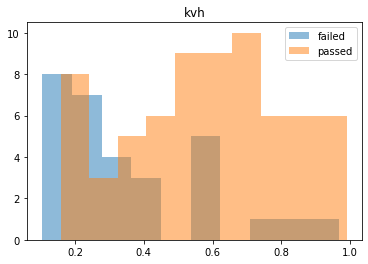

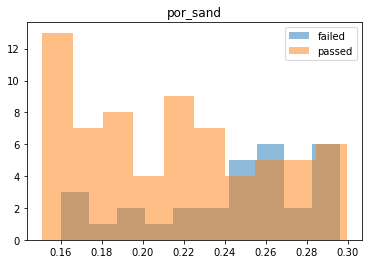

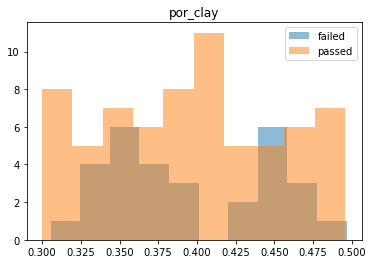

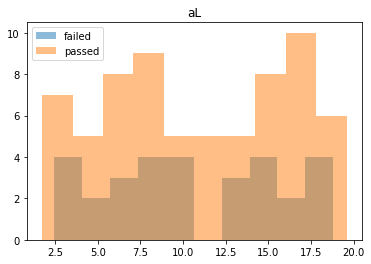

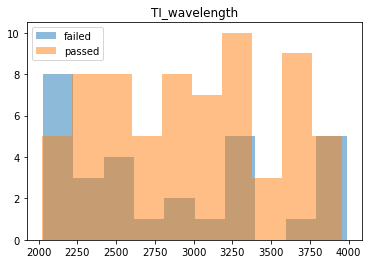

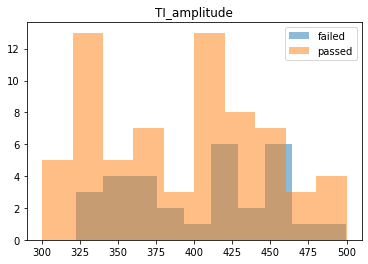

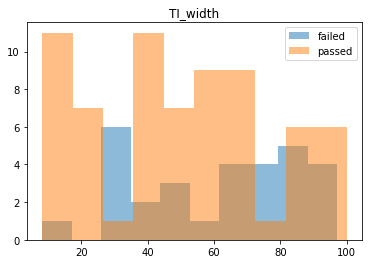

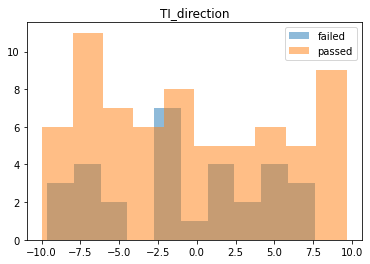

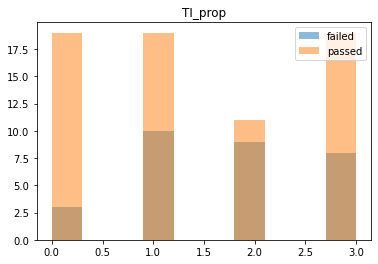

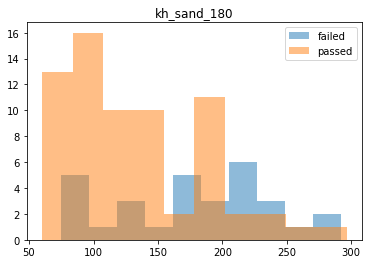

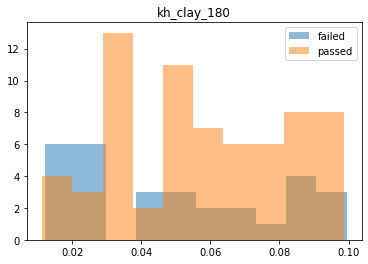

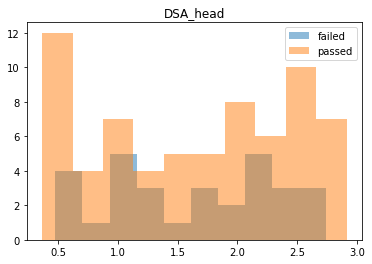

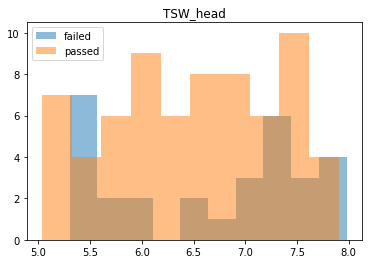

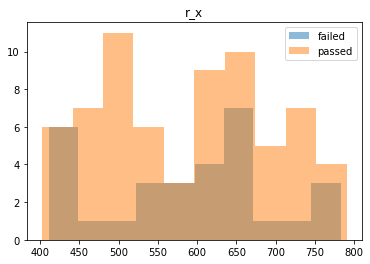

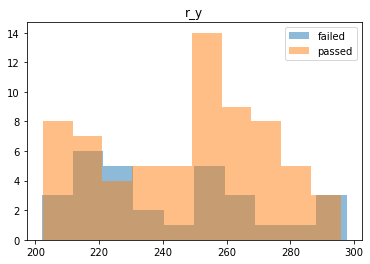

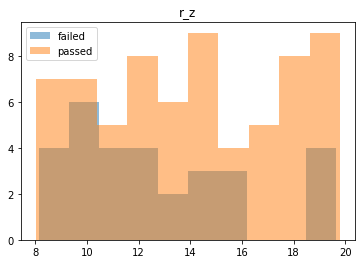

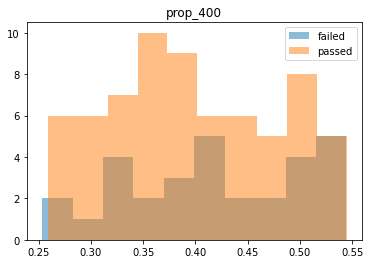

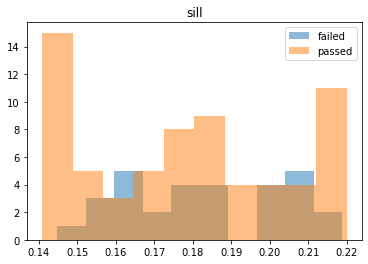

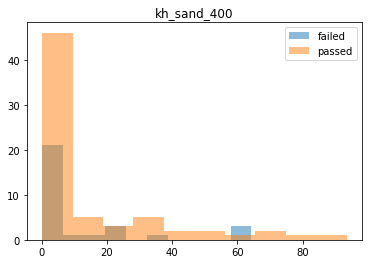

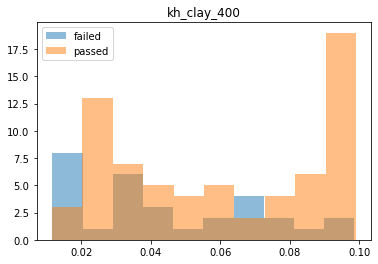

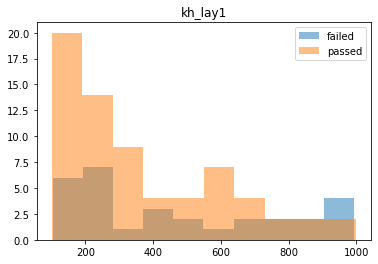

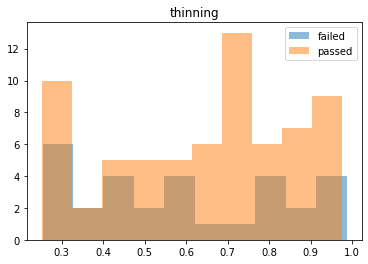

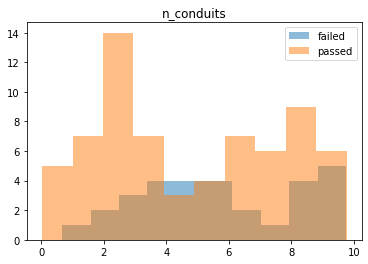

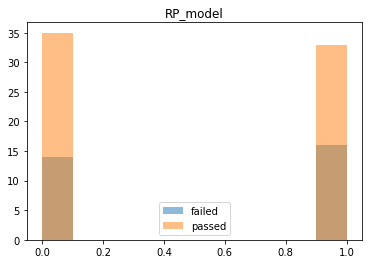

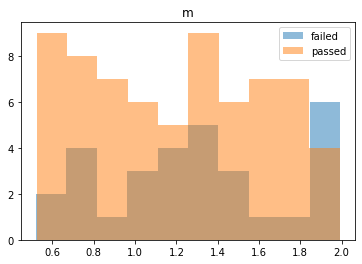

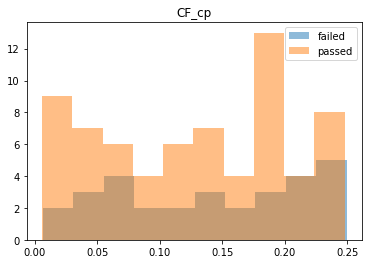

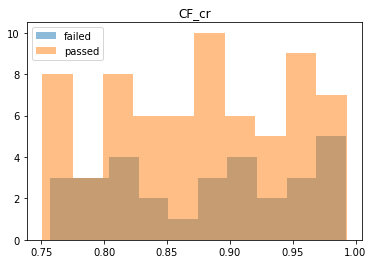

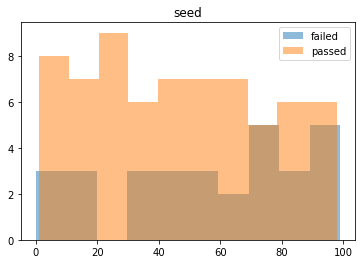

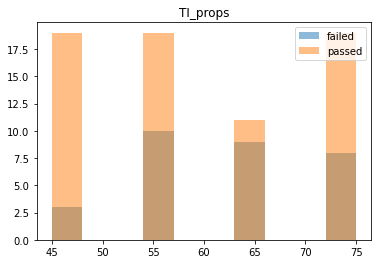

In [48]:
for k,v in varlist.items():
    plt.figure()
    plt.hist(v[its][failed],label='failed',alpha=.5)
    plt.hist(v[its][~failed],label='passed',alpha=.5)
    plt.title(k)
    plt.legend()
    plt.show()

In [6]:
import matplotlib.colors as mcolors
gamma=.7
f,axs = plt.subplots(len(varlist.keys()),len(varlist.keys()),figsize=(15,15))
for j,(k,v) in enumerate(varlist.items()):
    for i,(k2,v2) in enumerate(varlist.items()):
        
        if i>5:
            break
            
        plt.sca(axs[i,j])
        ax = plt.gca()
        ax.hist2d(v[its][failed],v2[its][failed],norm=mcolors.PowerNorm(gamma))
        plt.title('{} vs {}'.format(k,k2))
        plt.xlabel(k)
        plt.ylabel(k2)
plt.show()

KeyboardInterrupt: 

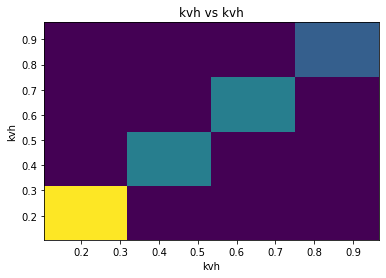

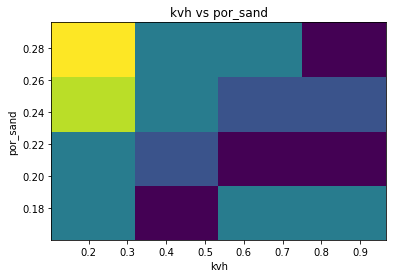

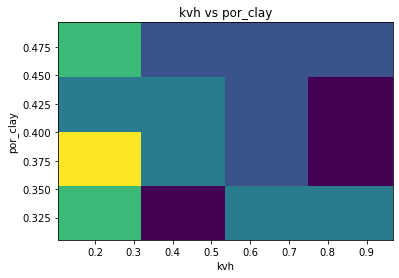

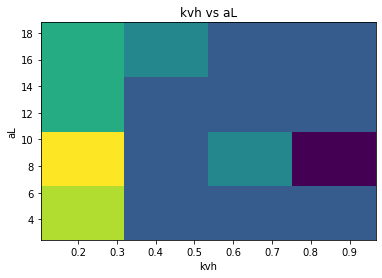

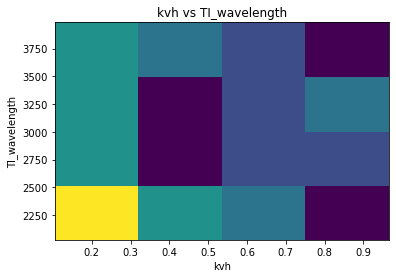

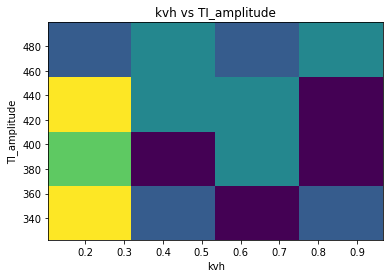

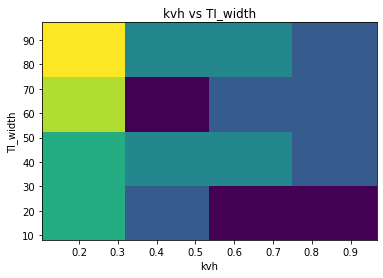

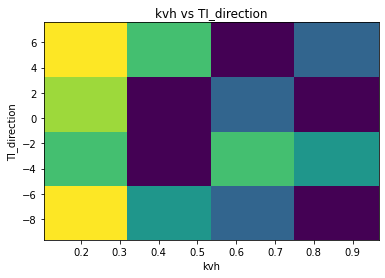

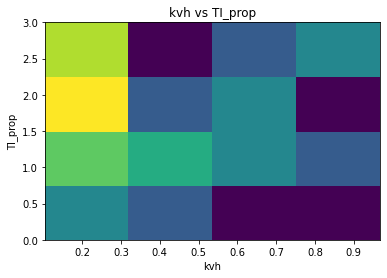

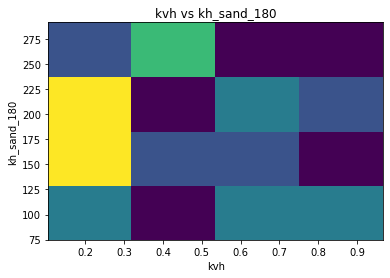

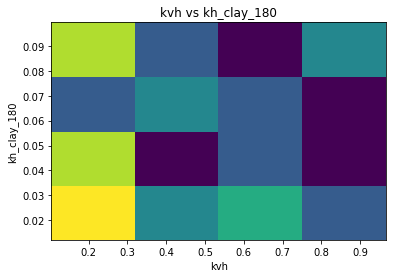

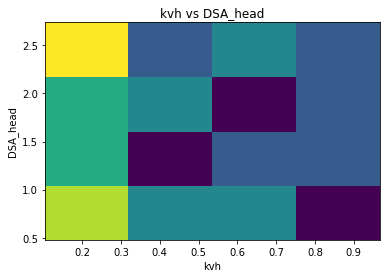

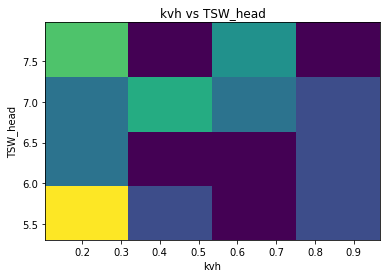

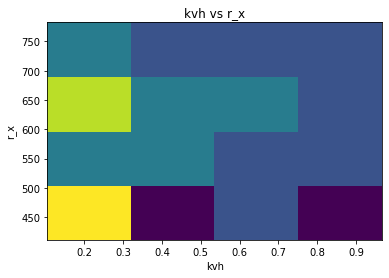

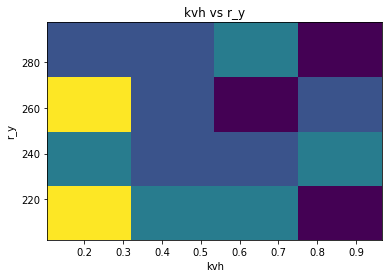

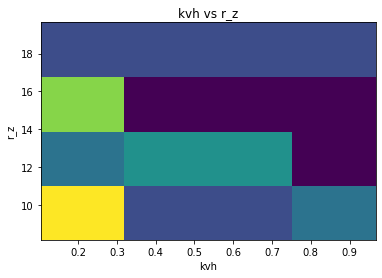

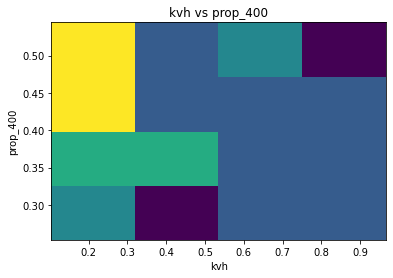

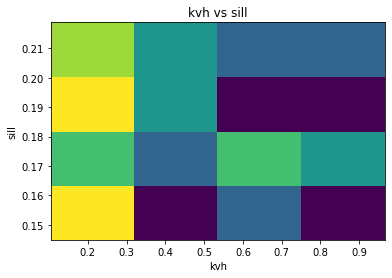

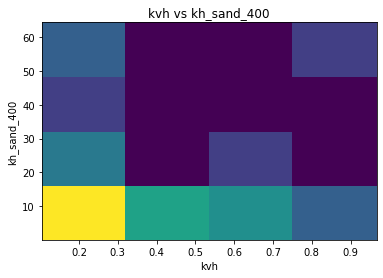

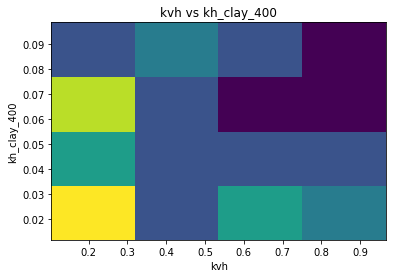

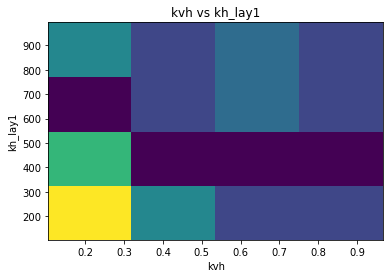

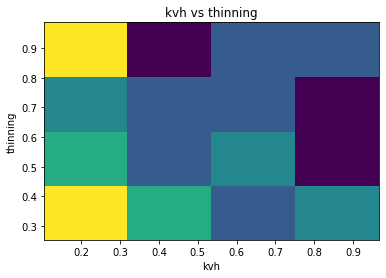

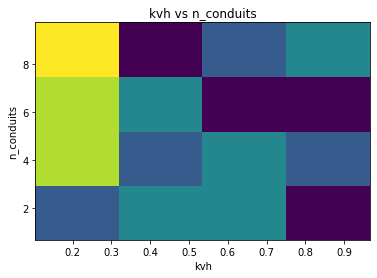

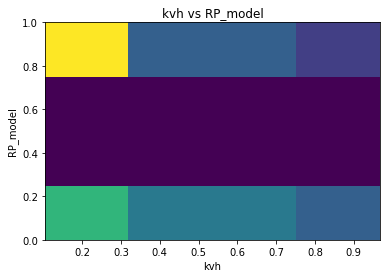

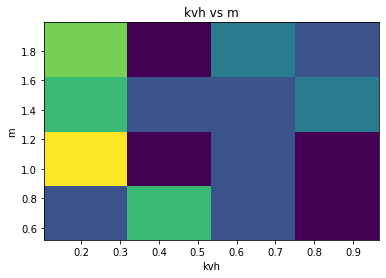

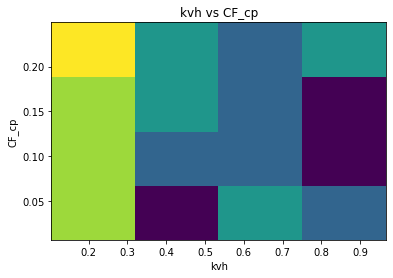

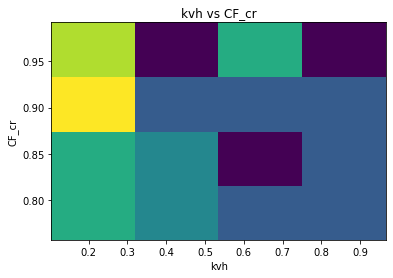

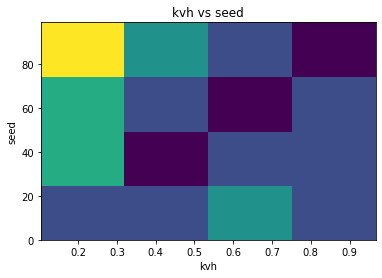

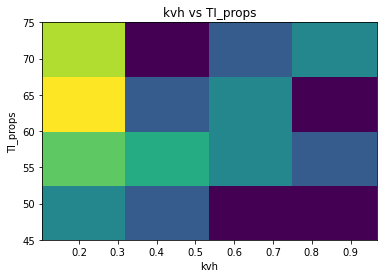

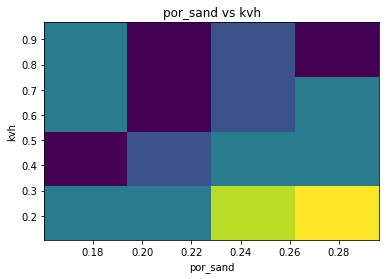

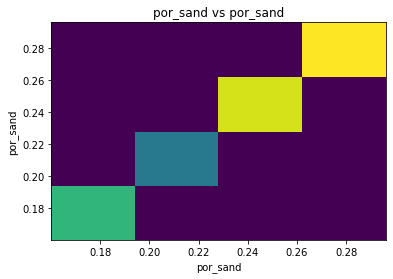

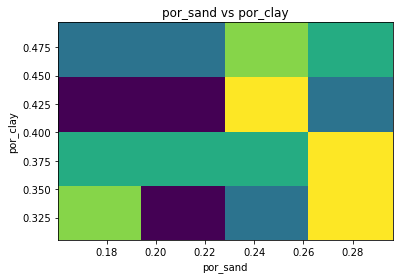

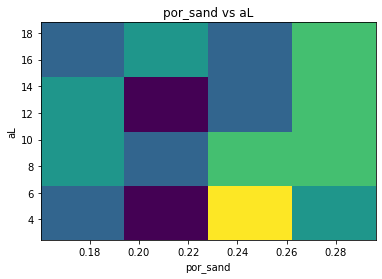

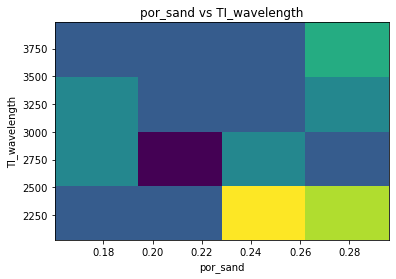

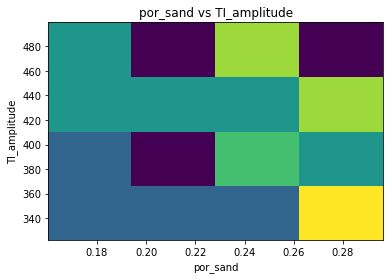

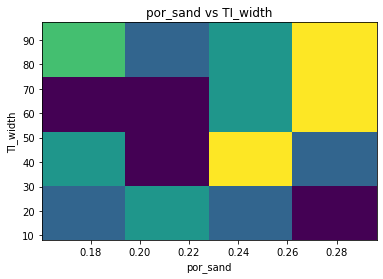

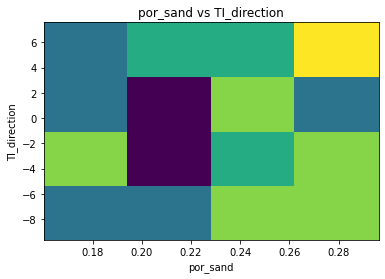

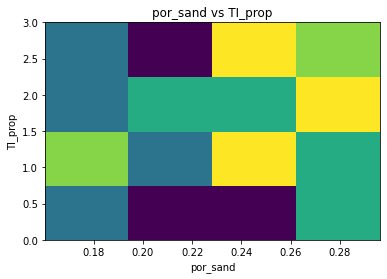

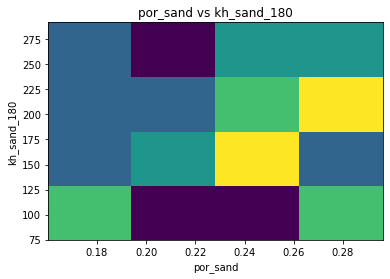

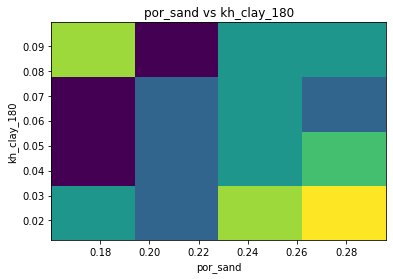

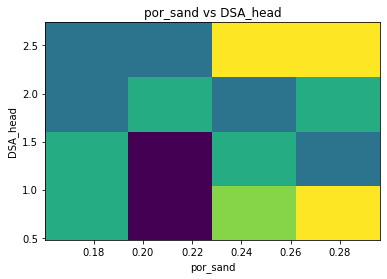

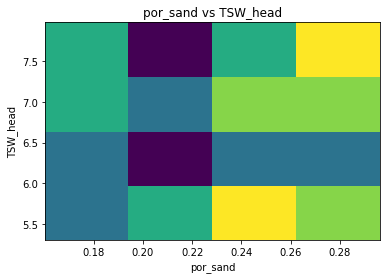

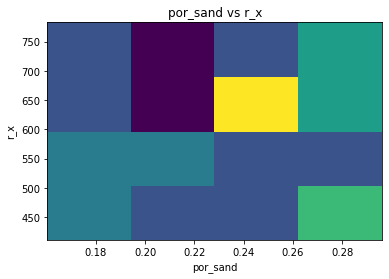

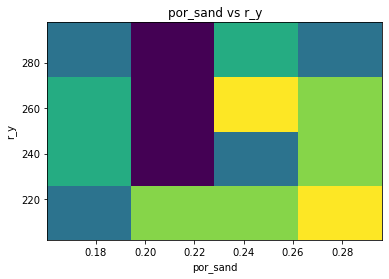

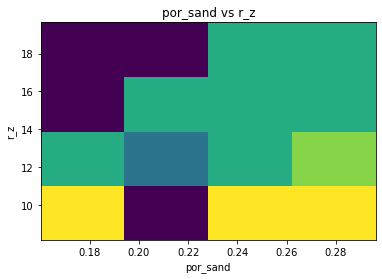

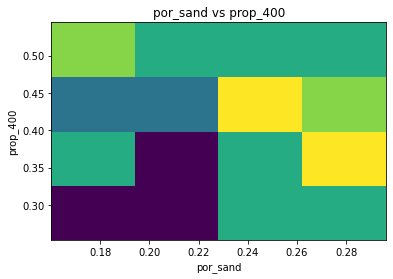

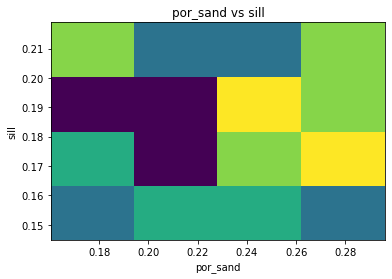

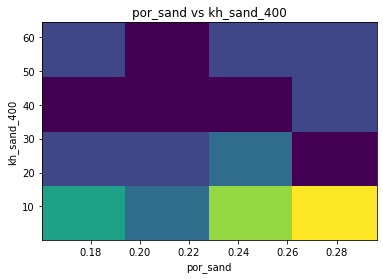

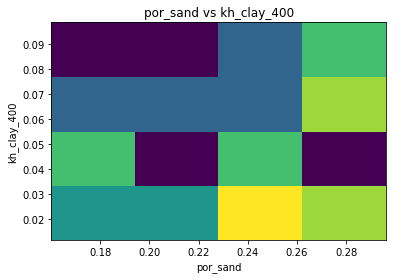

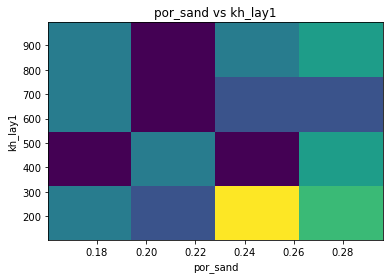

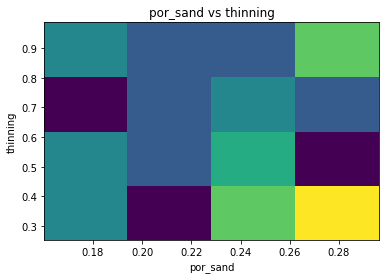

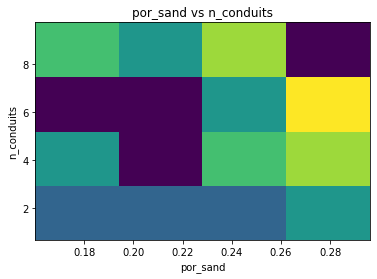

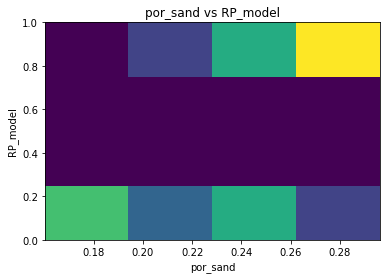

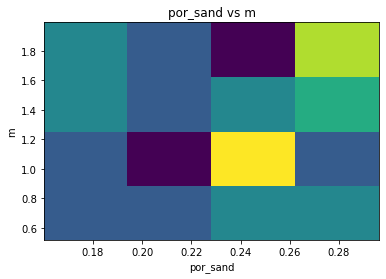

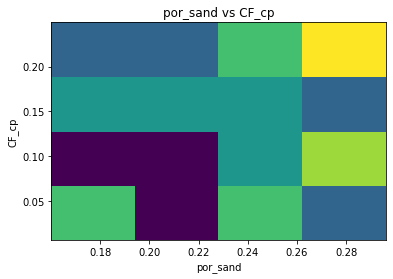

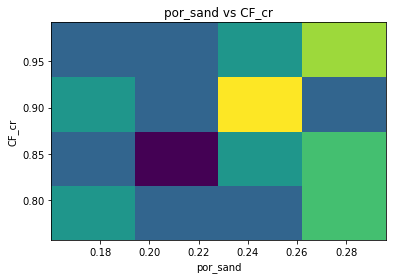

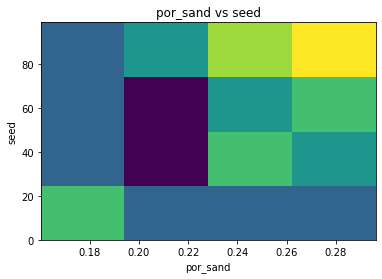

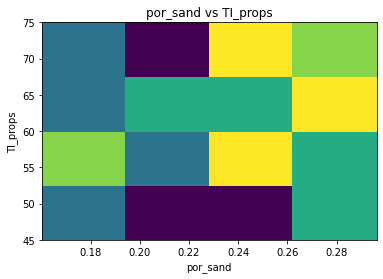

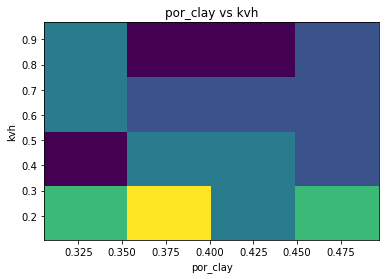

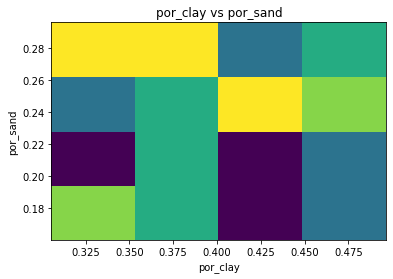

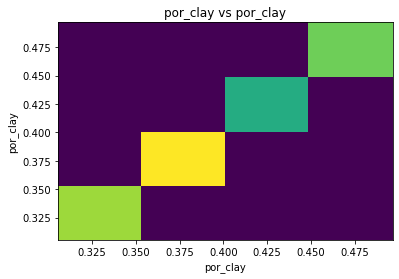

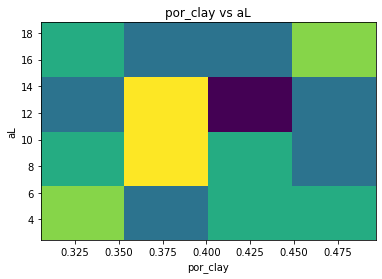

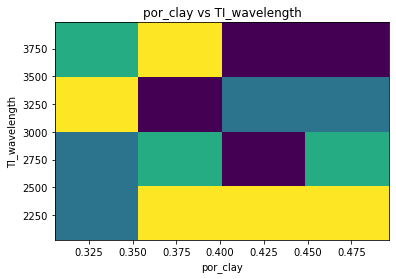

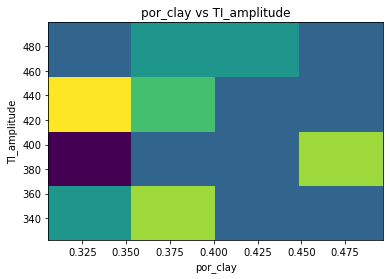

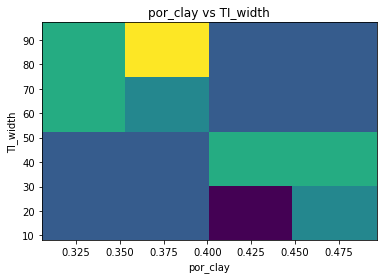

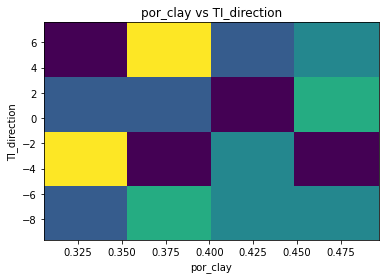

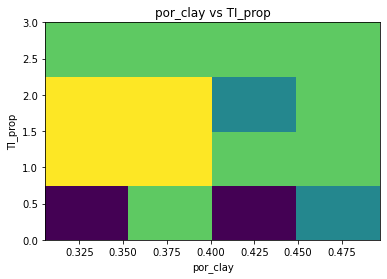

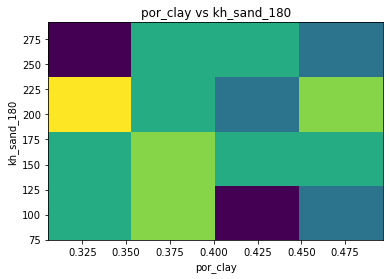

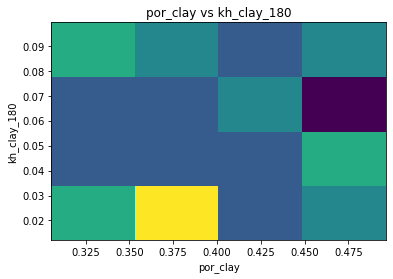

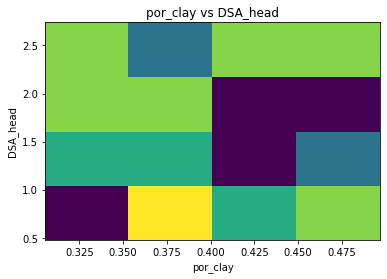

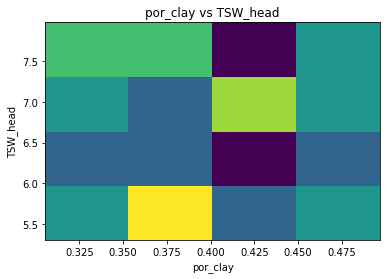

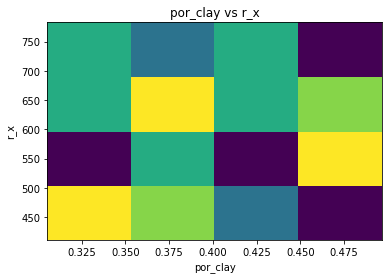

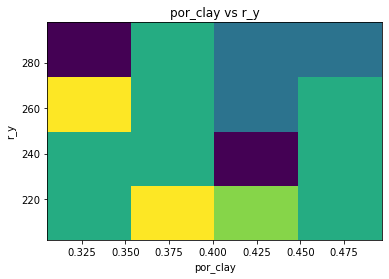

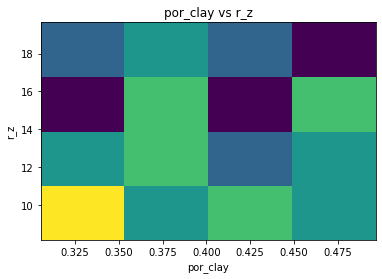

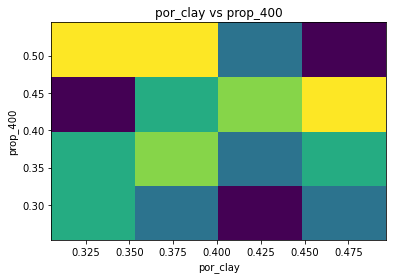

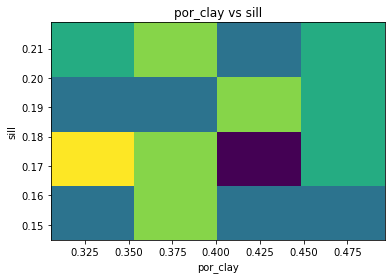

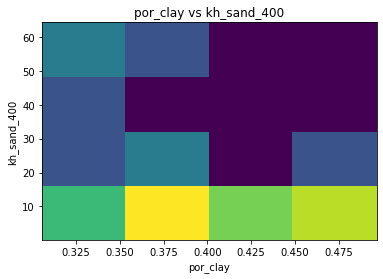

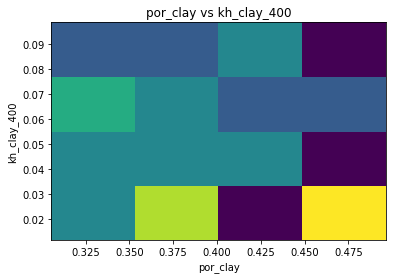

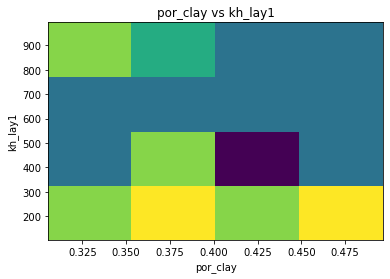

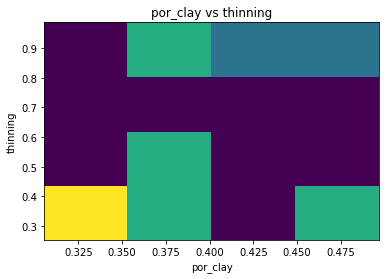

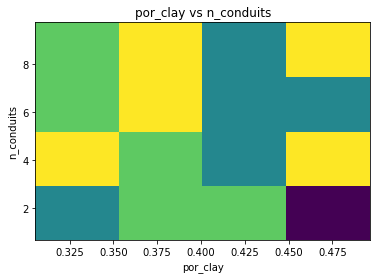

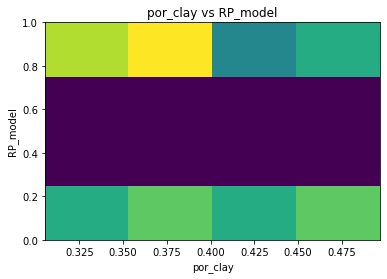

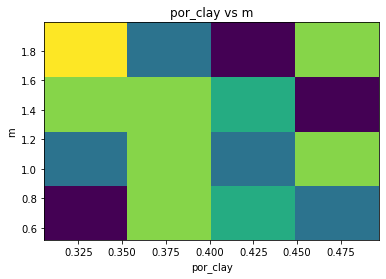

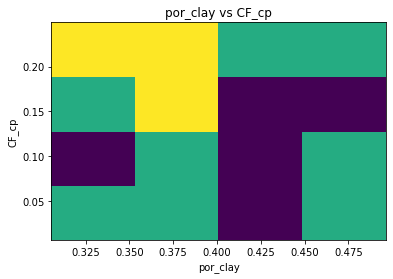

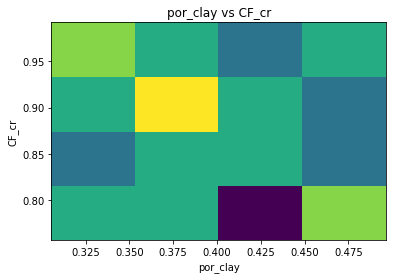

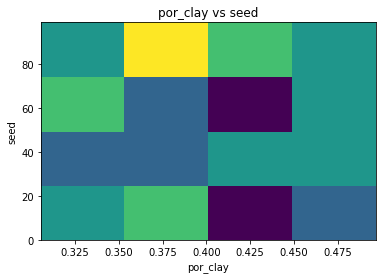

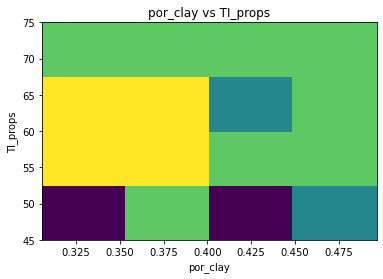

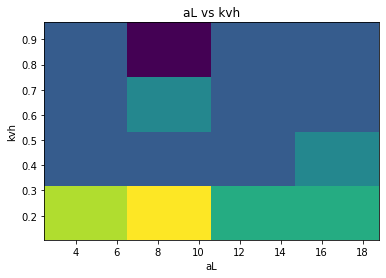

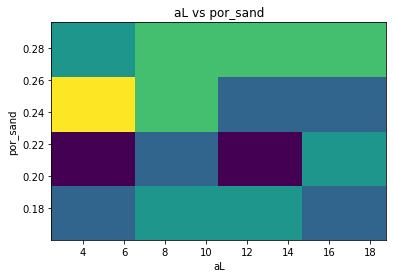

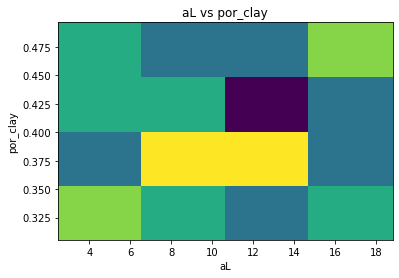

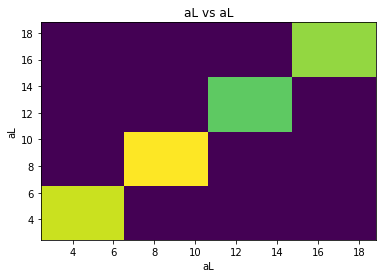

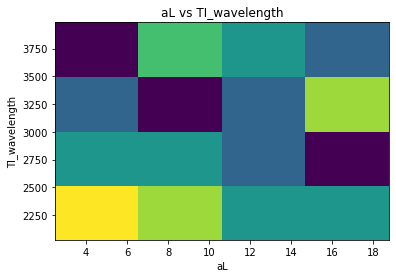

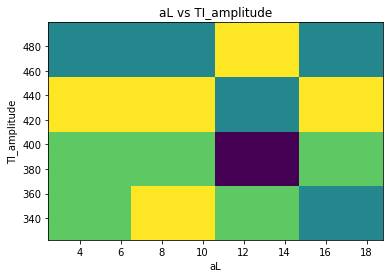

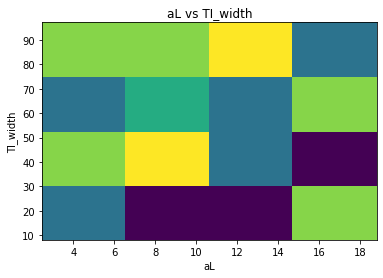

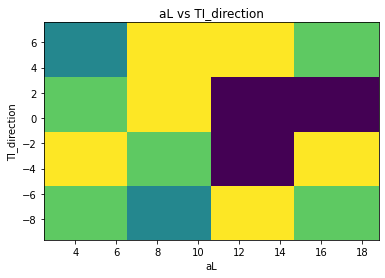

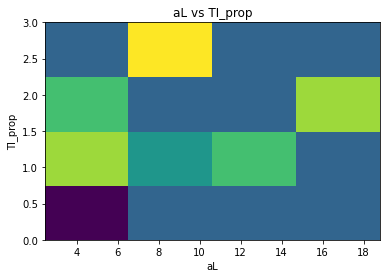

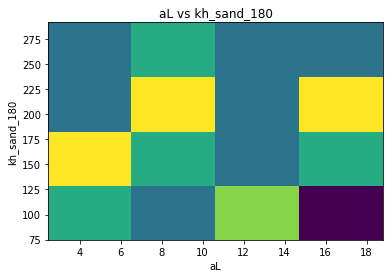

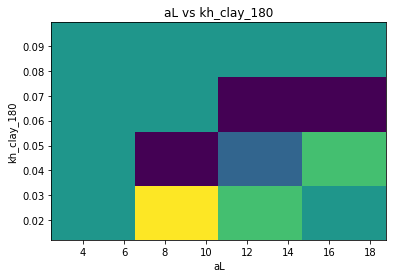

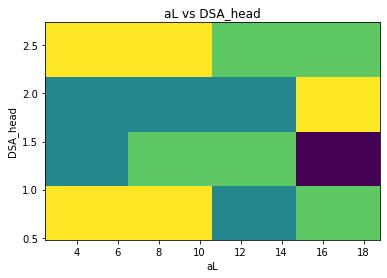

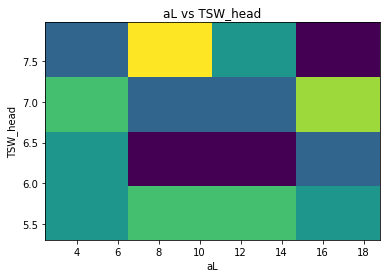

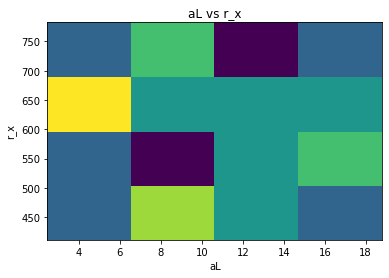

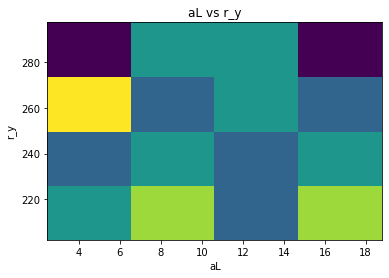

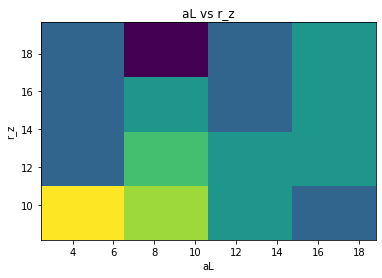

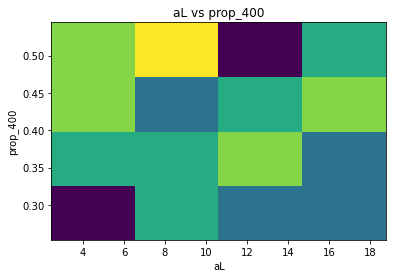

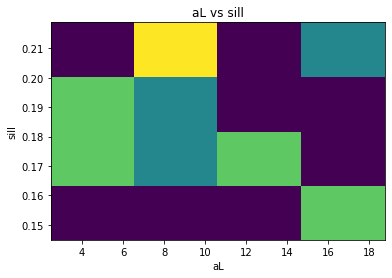

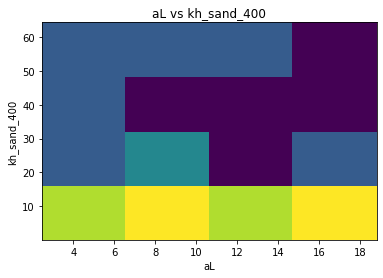

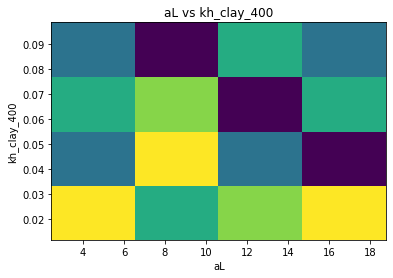

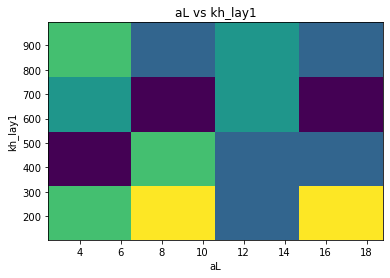

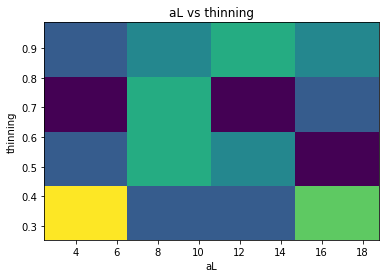

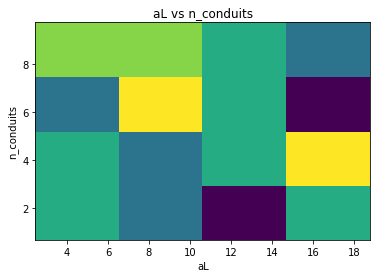

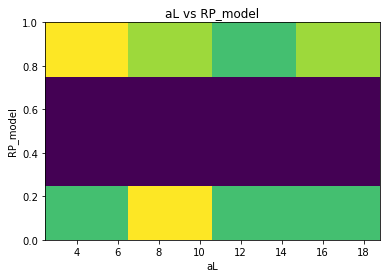

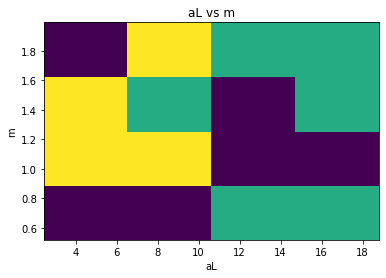

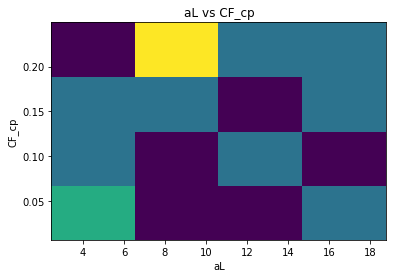

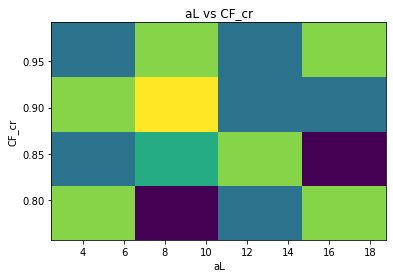

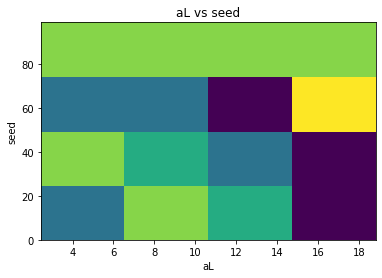

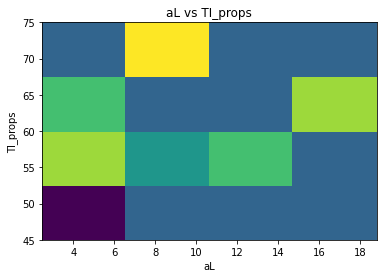

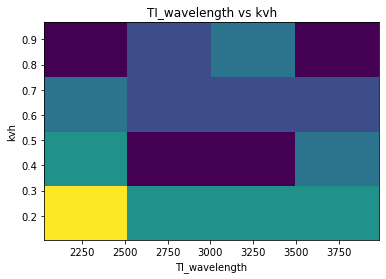

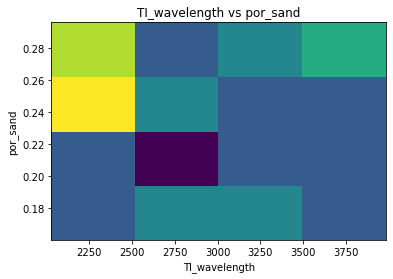

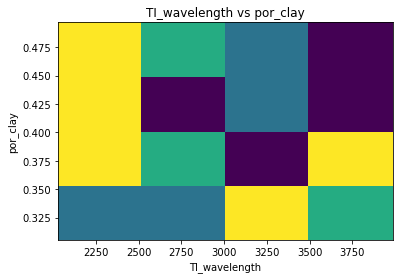

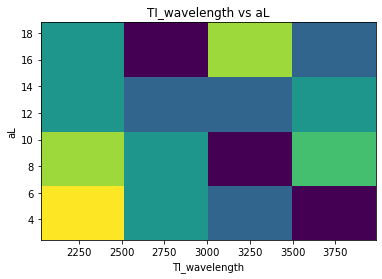

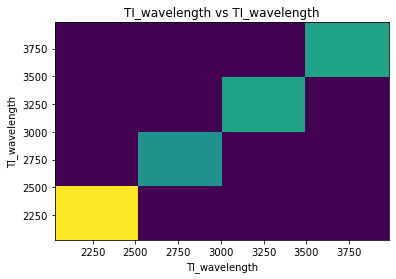

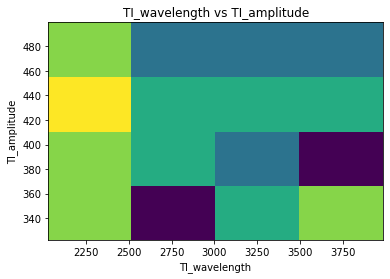

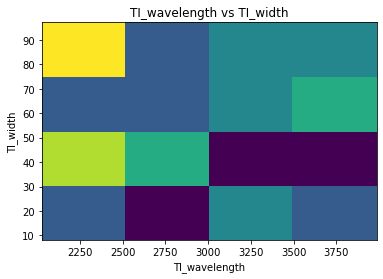

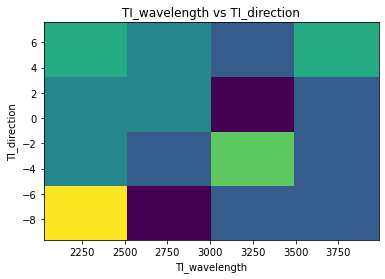

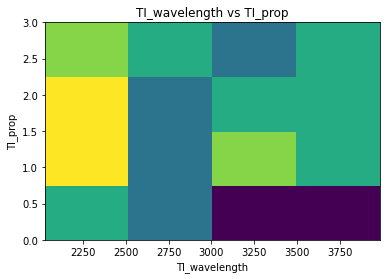

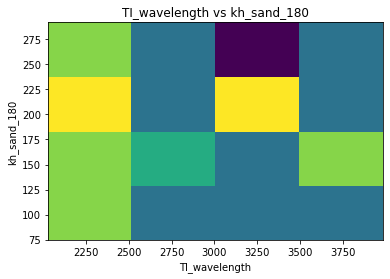

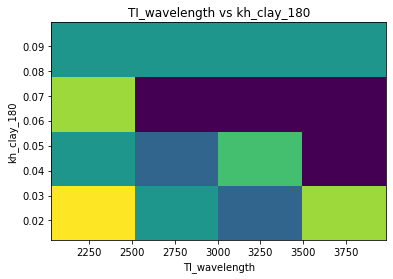

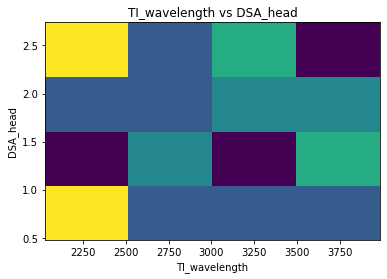

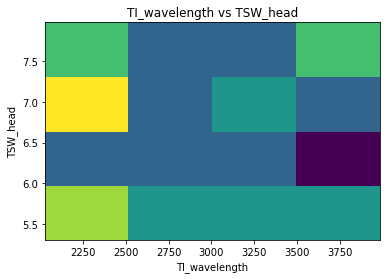

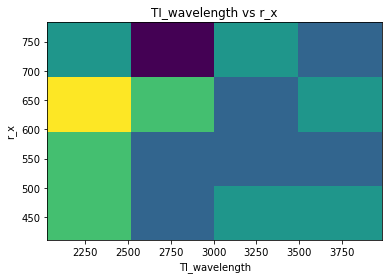

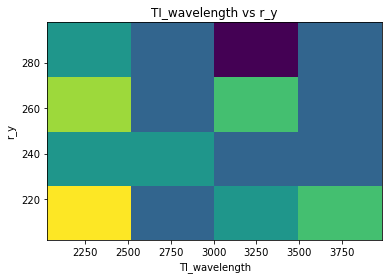

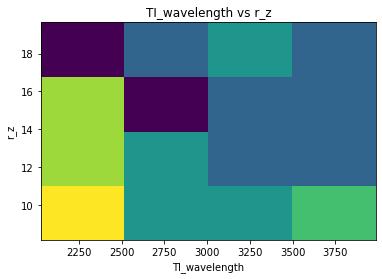

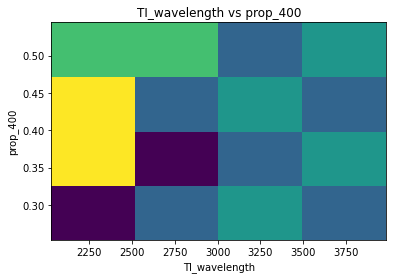

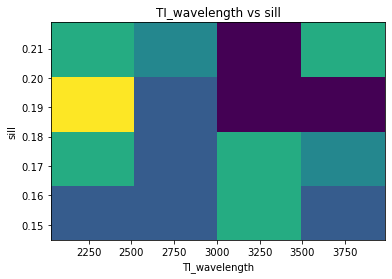

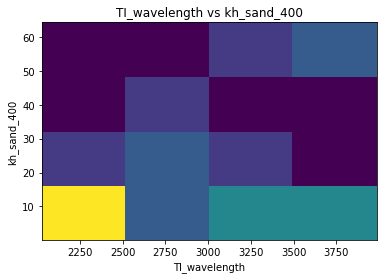

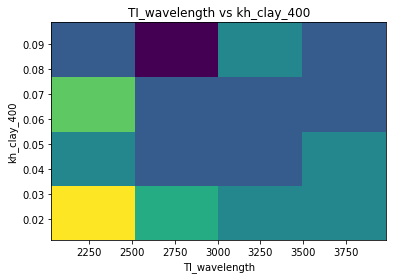

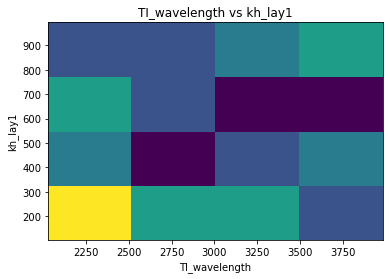

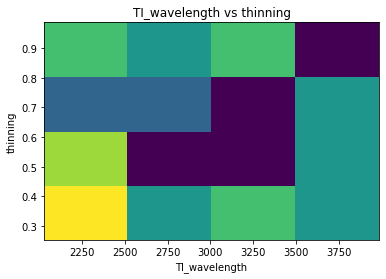

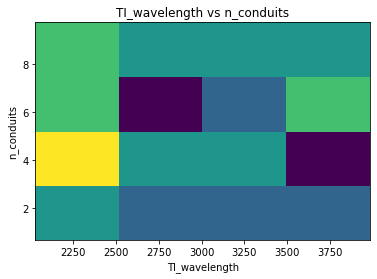

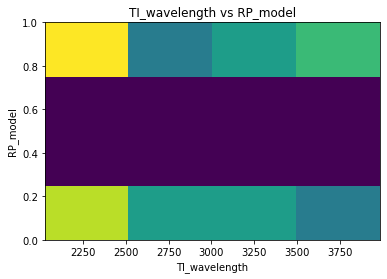

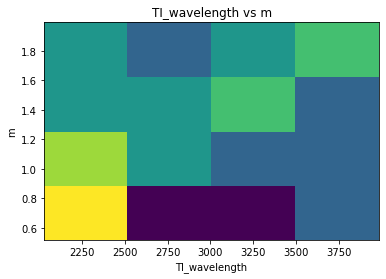

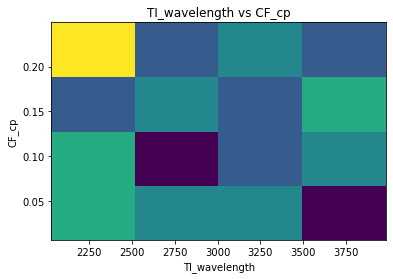

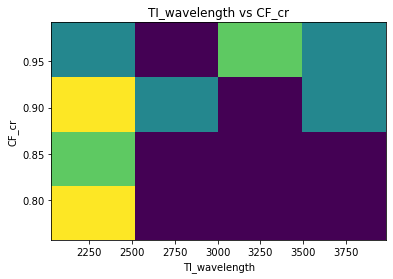

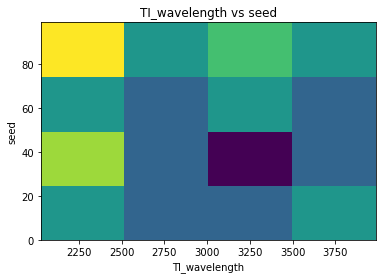

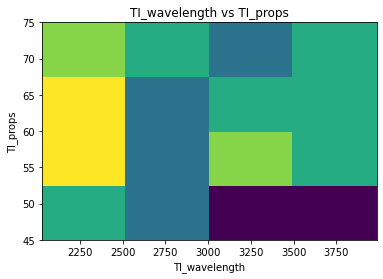

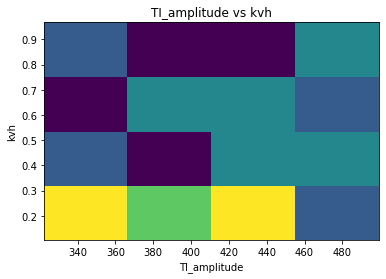

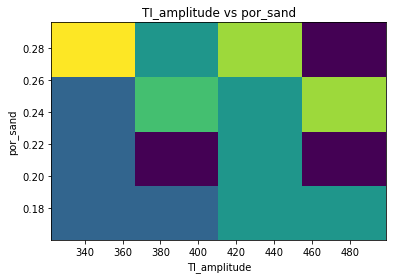

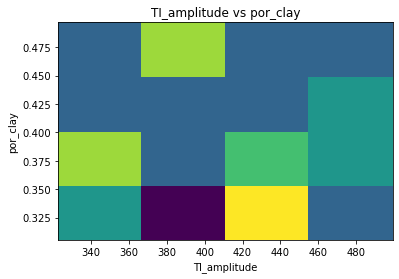

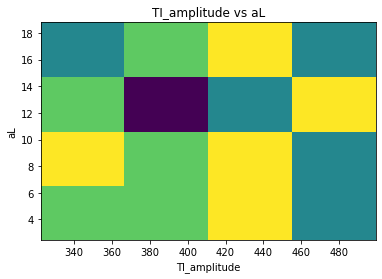

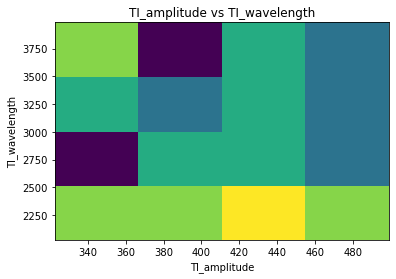

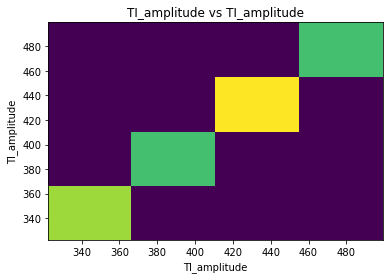

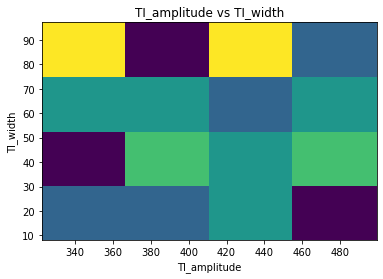

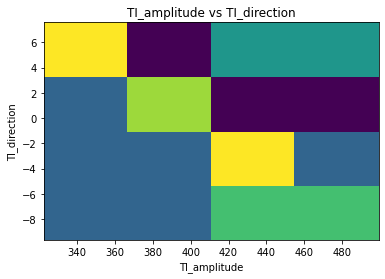

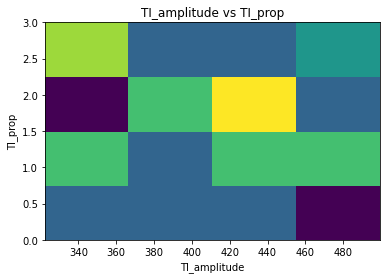

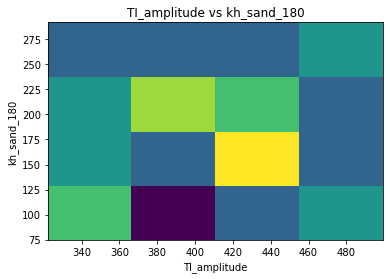

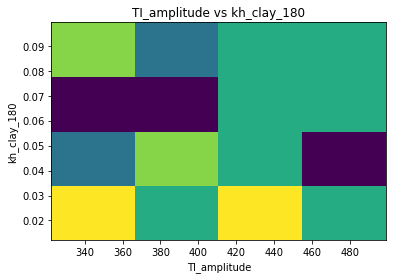

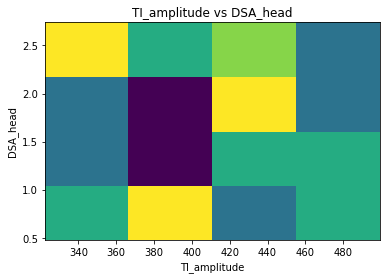

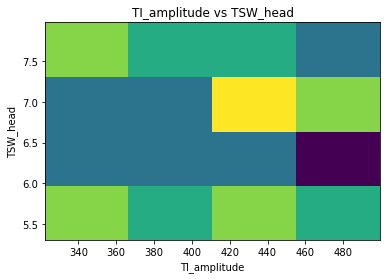

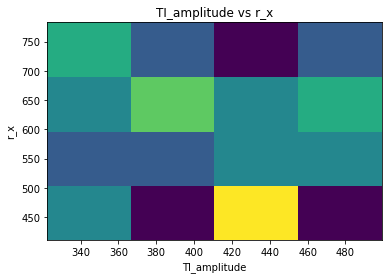

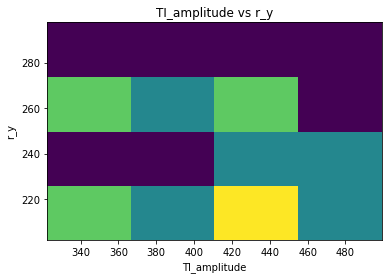

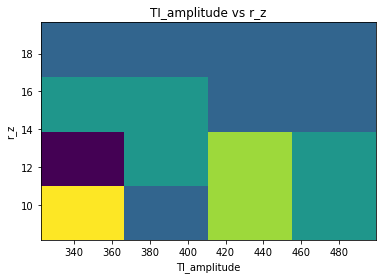

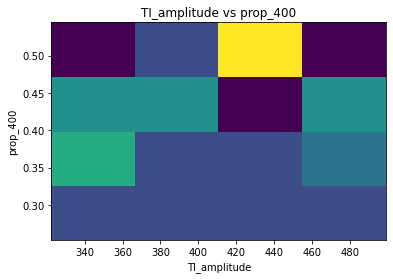

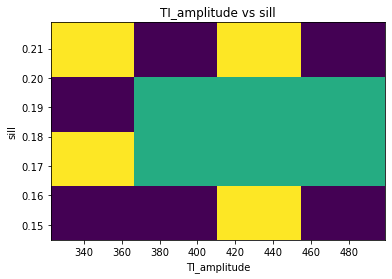

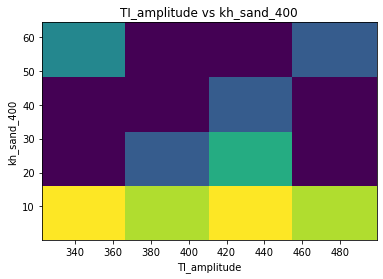

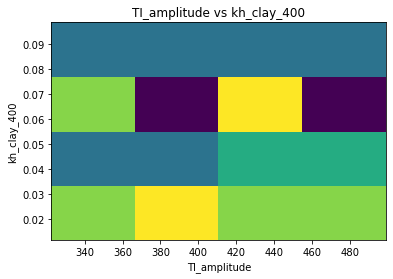

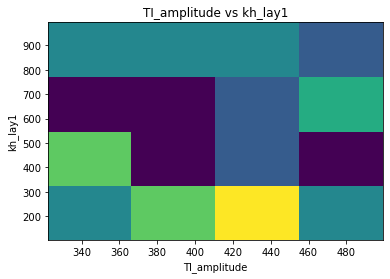

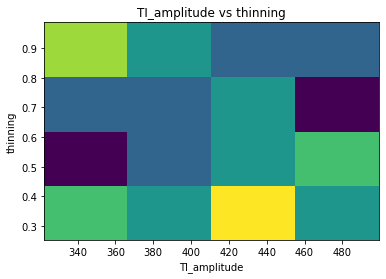

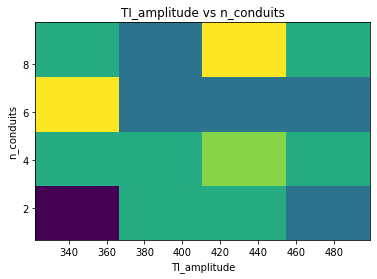

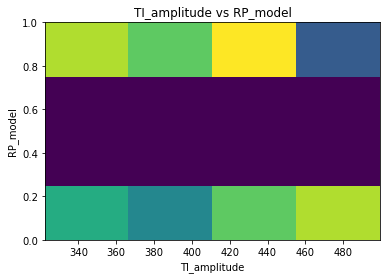

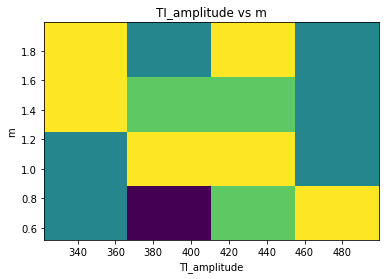

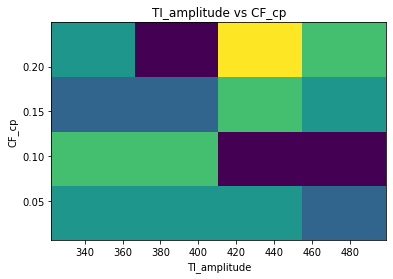

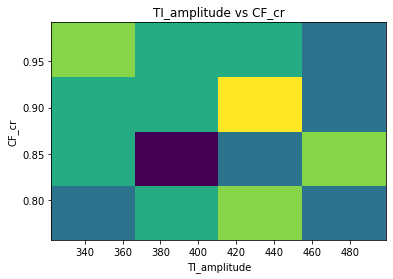

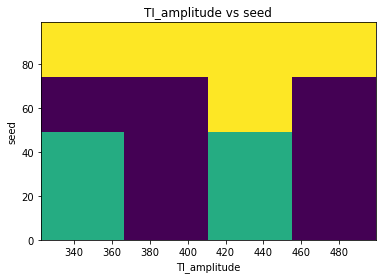

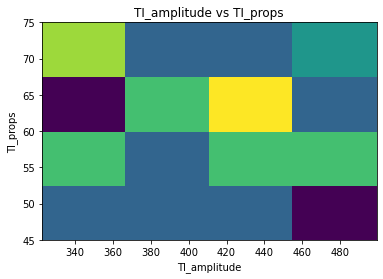

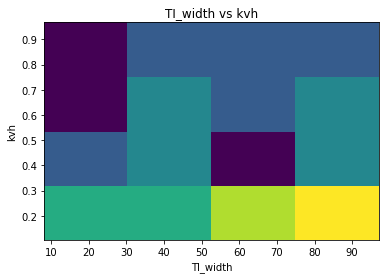

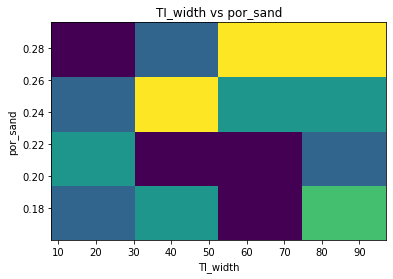

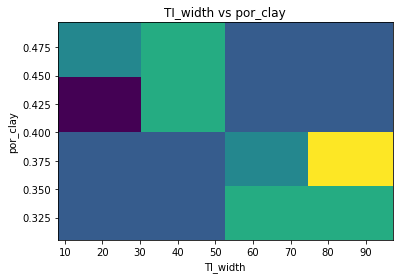

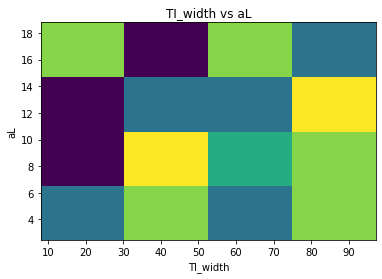

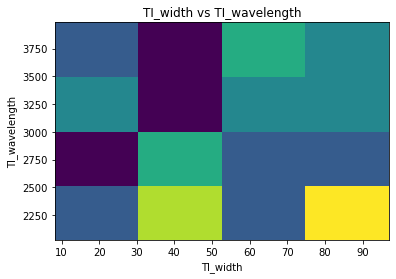

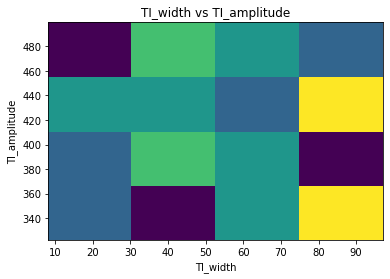

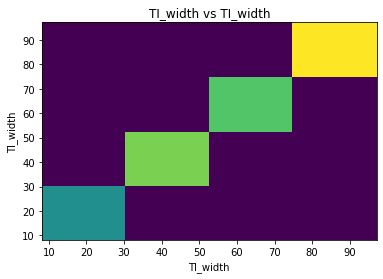

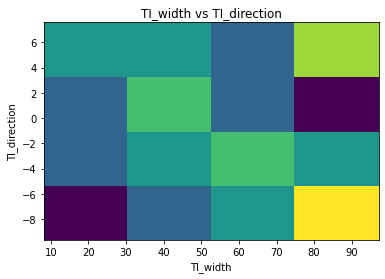

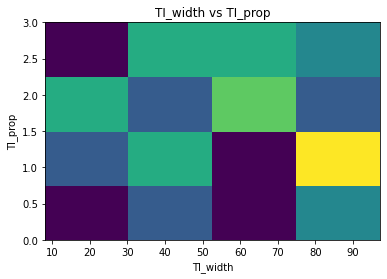

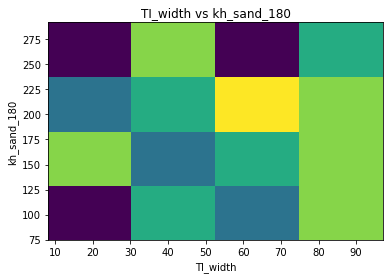

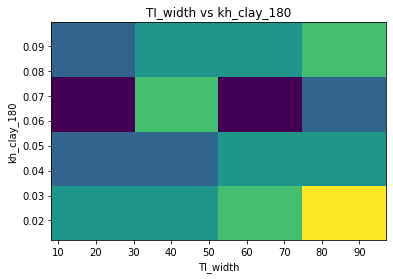

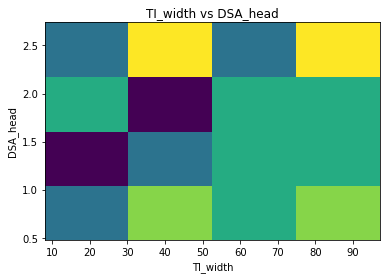

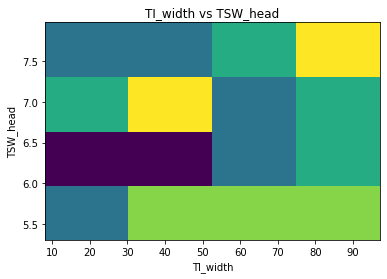

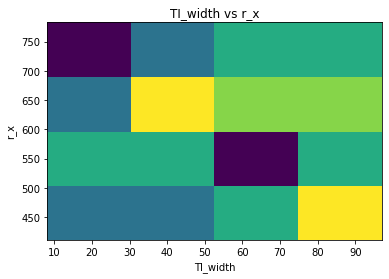

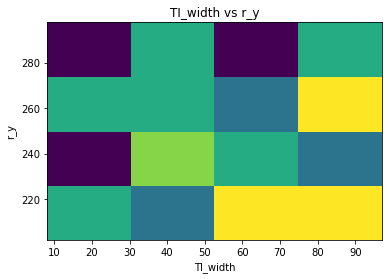

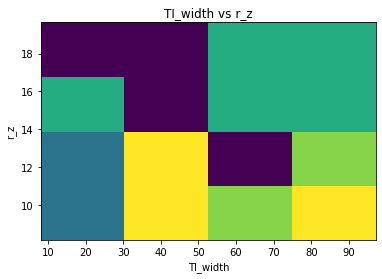

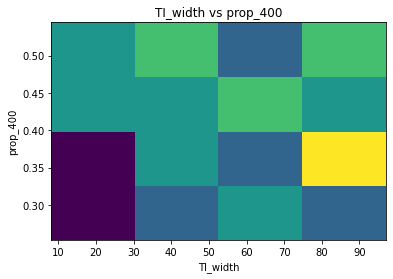

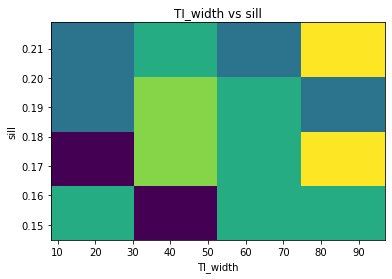

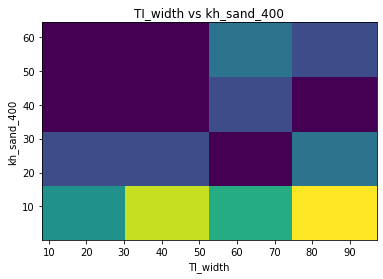

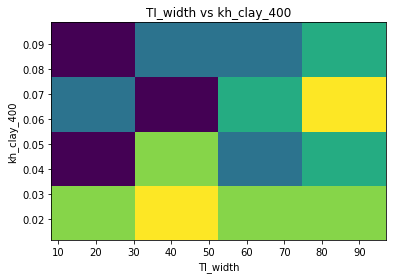

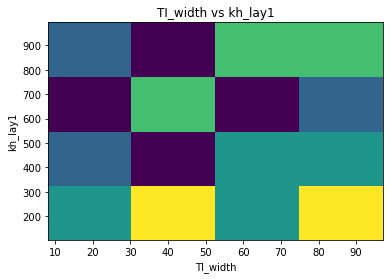

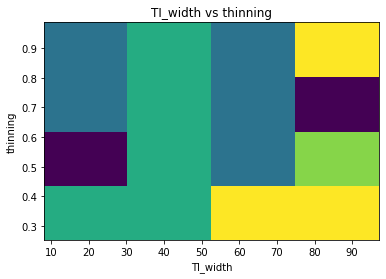

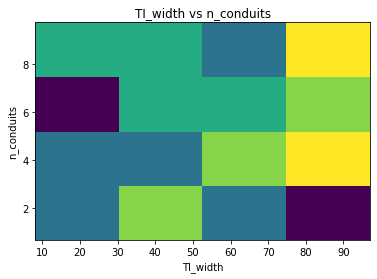

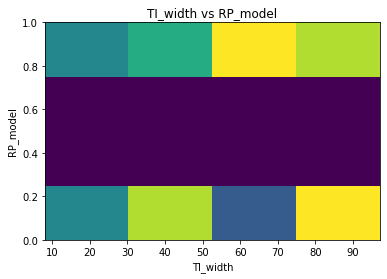

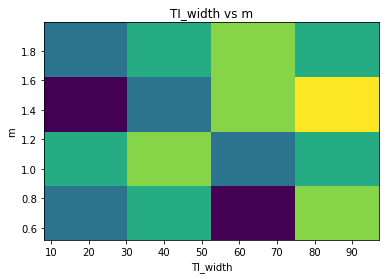

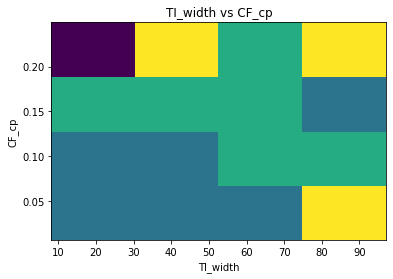

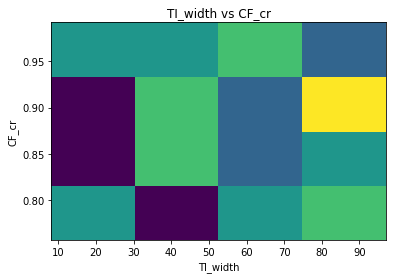

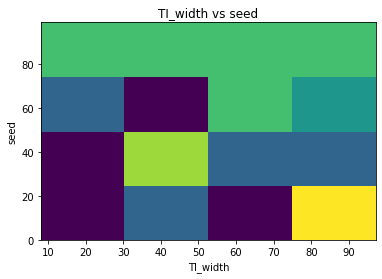

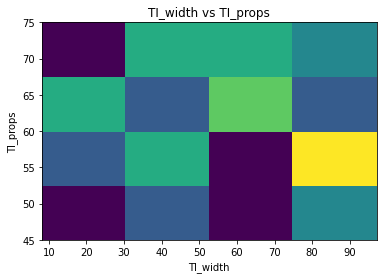

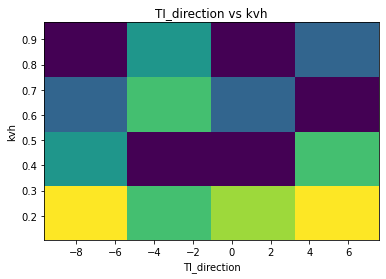

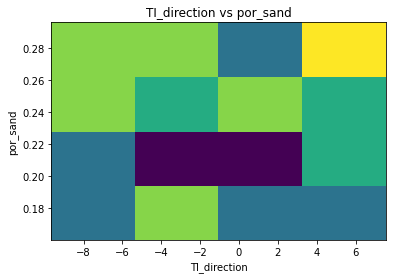

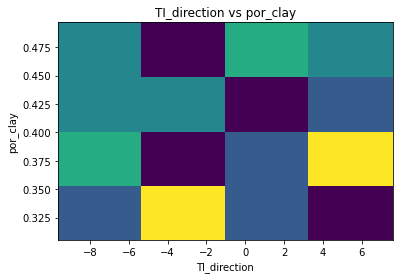

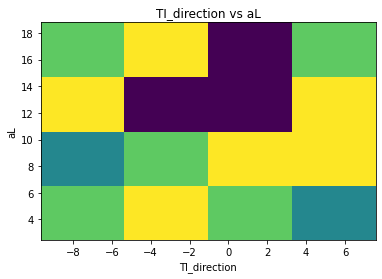

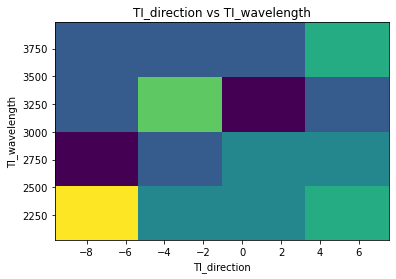

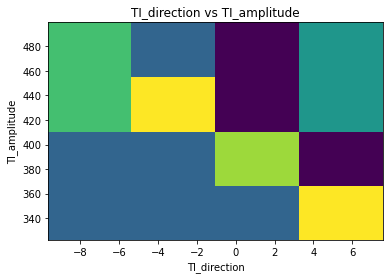

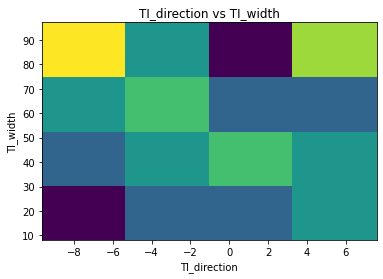

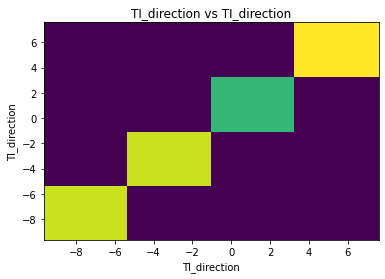

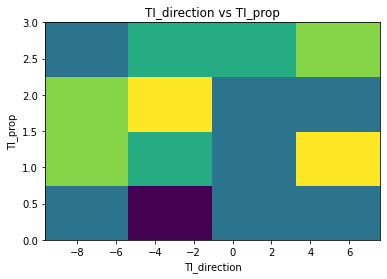

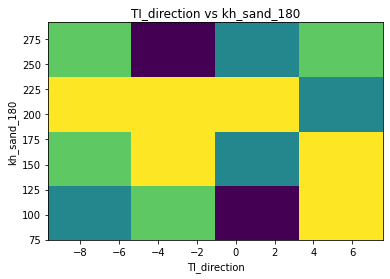

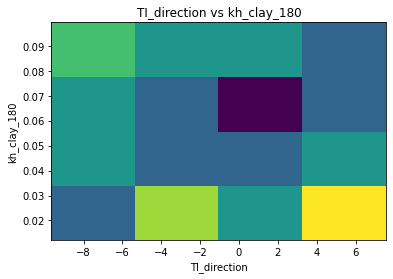

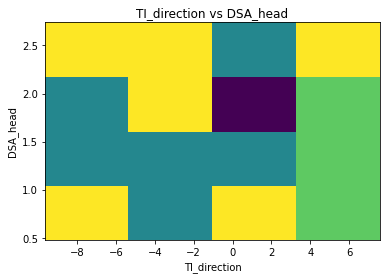

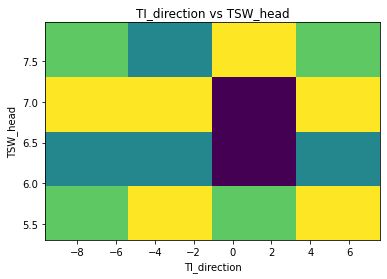

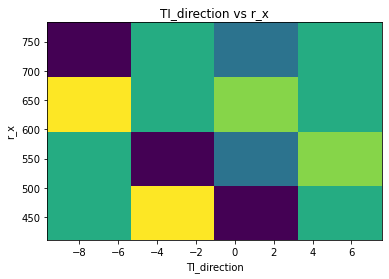

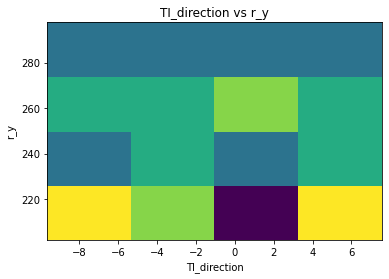

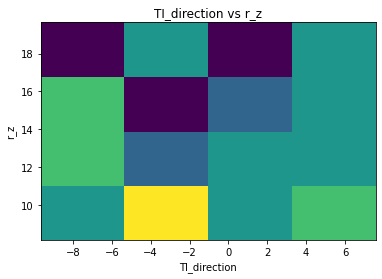

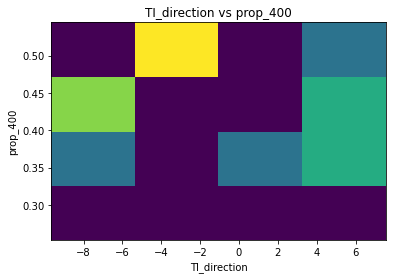

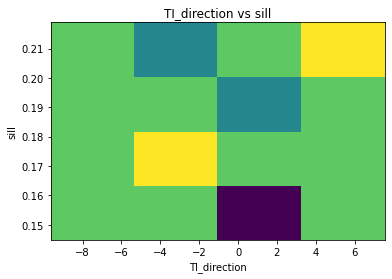

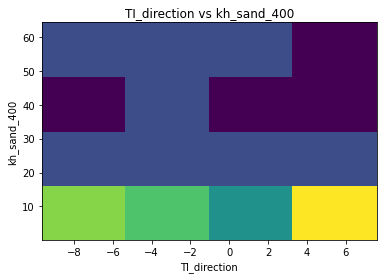

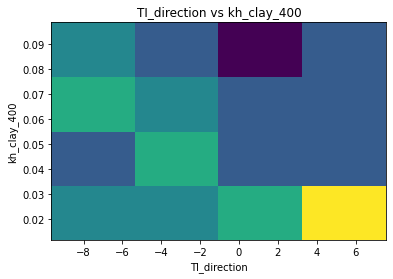

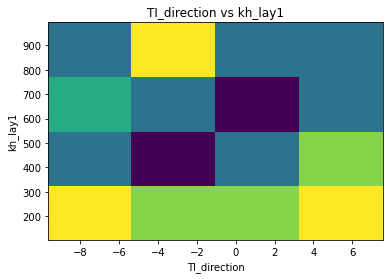

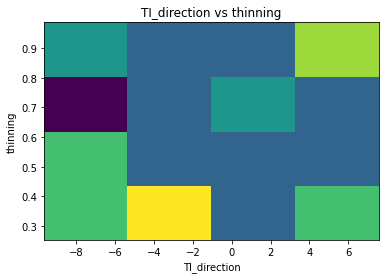

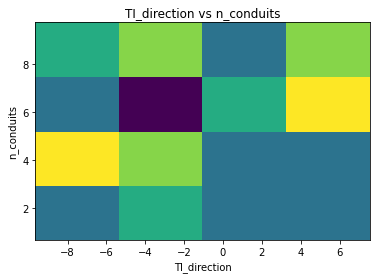

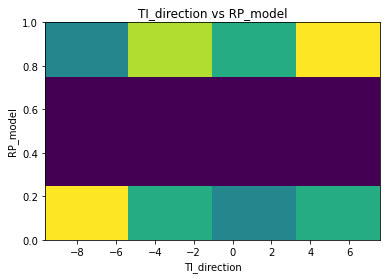

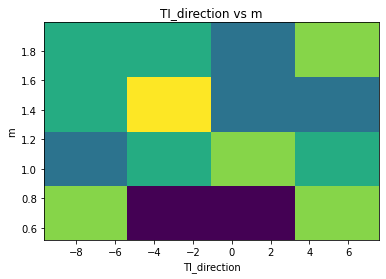

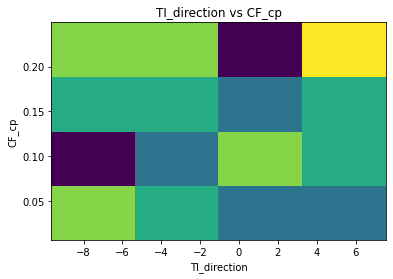

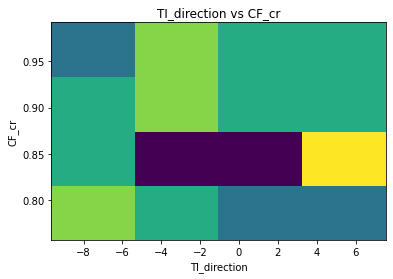

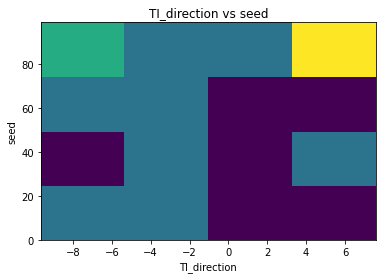

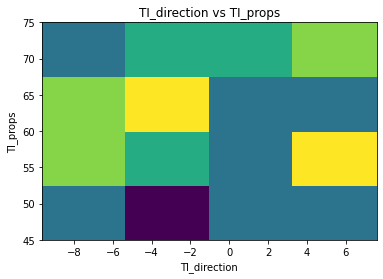

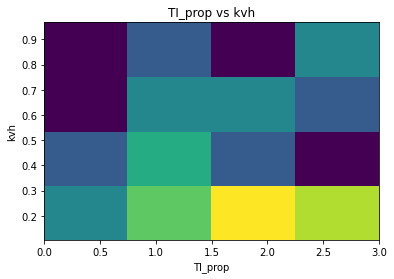

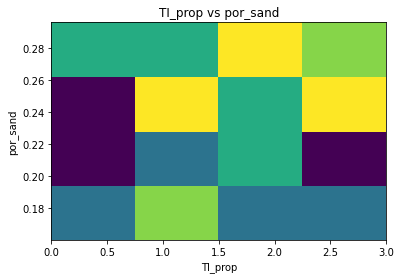

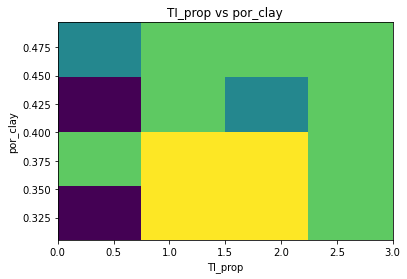

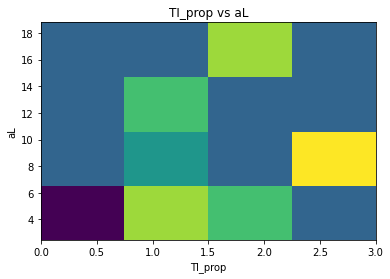

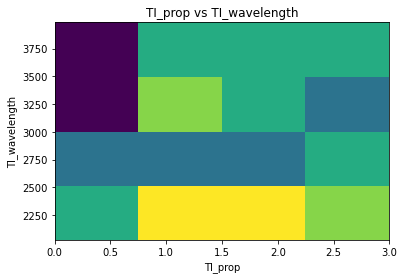

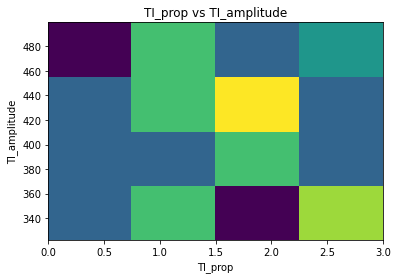

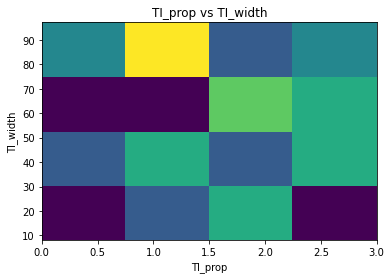

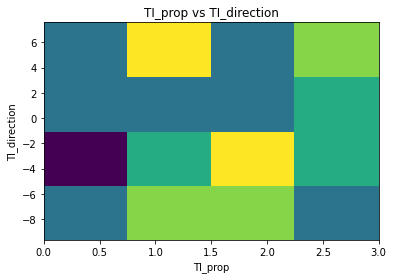

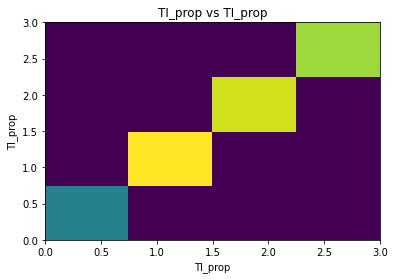

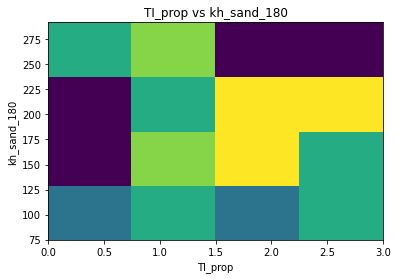

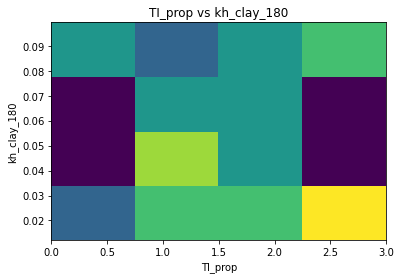

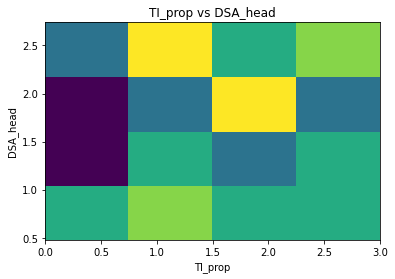

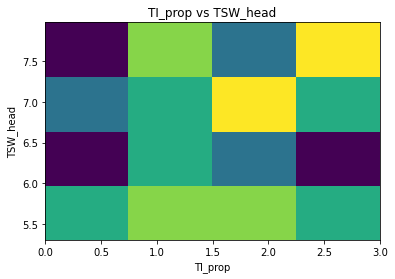

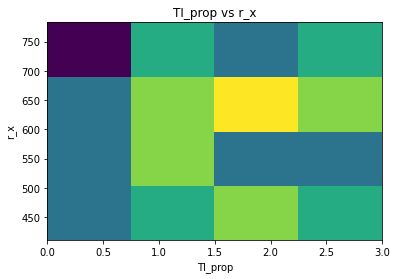

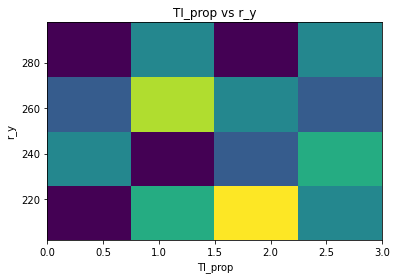

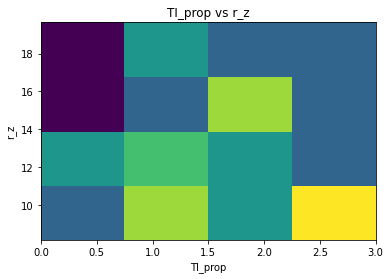

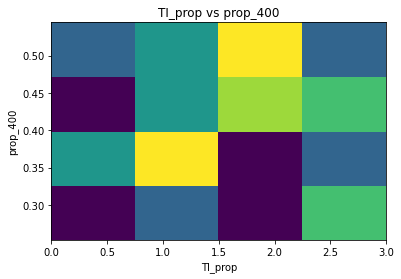

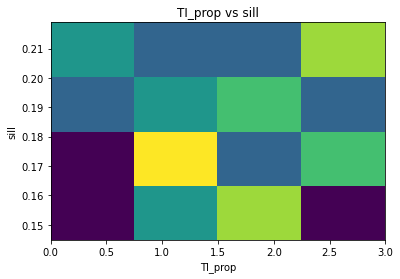

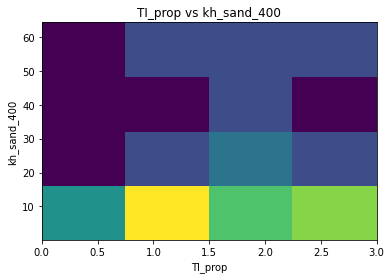

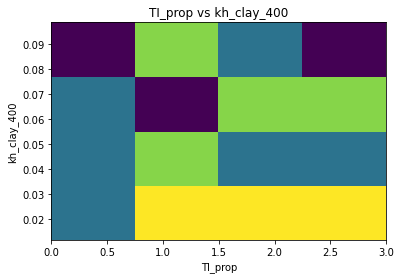

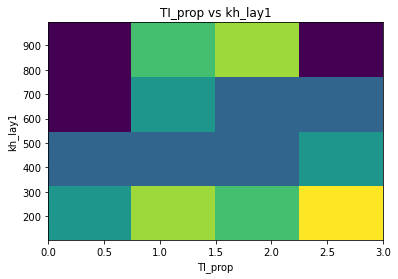

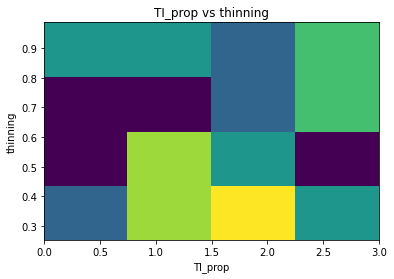

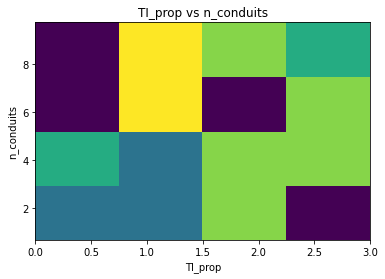

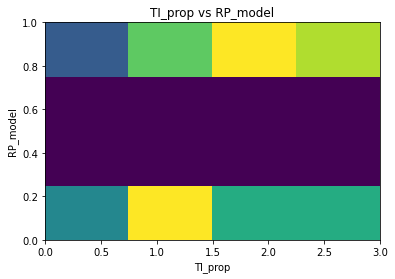

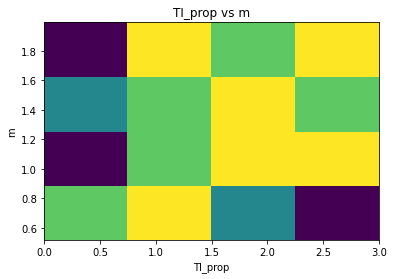

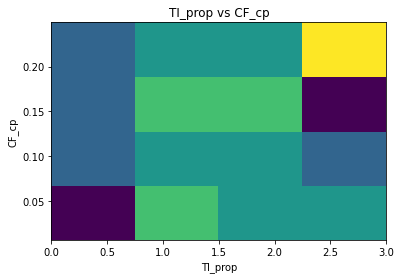

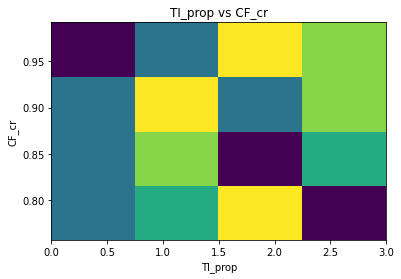

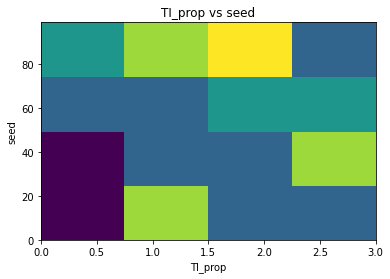

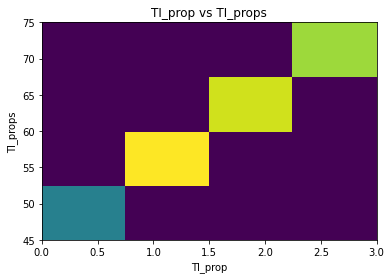

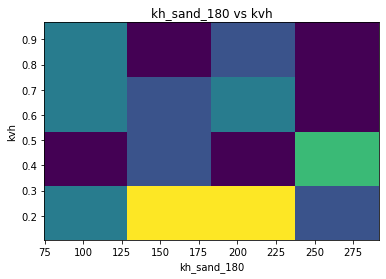

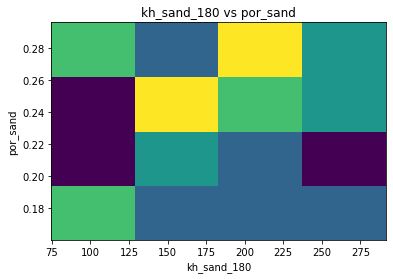

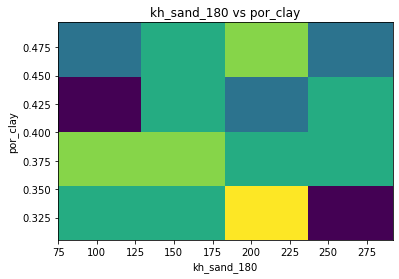

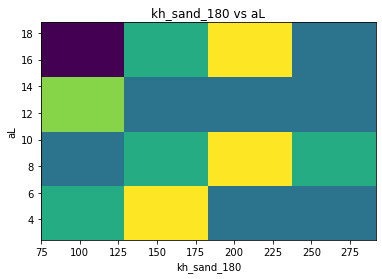

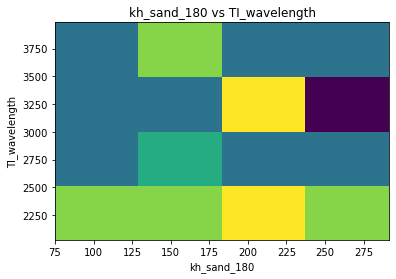

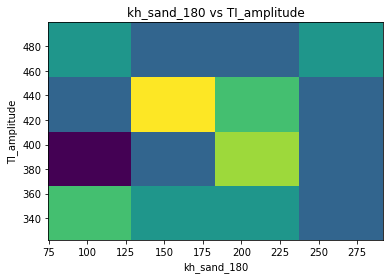

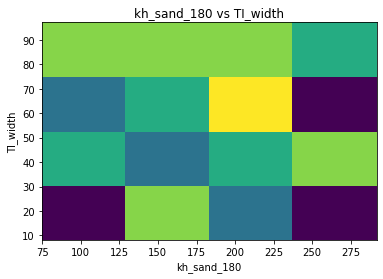

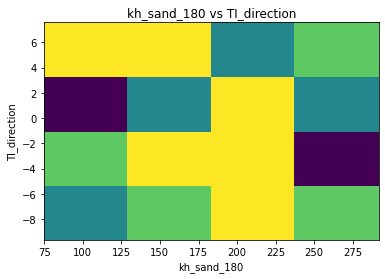

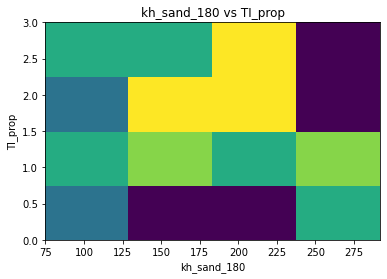

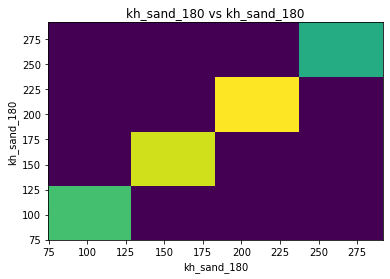

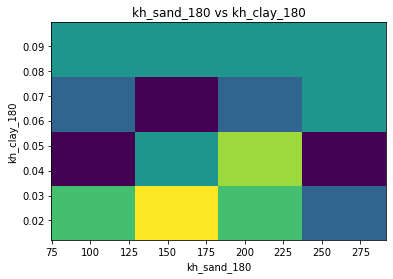

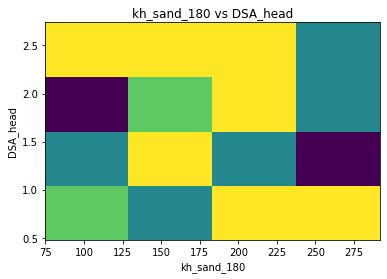

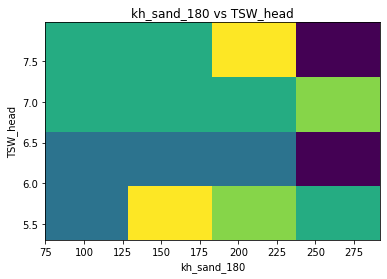

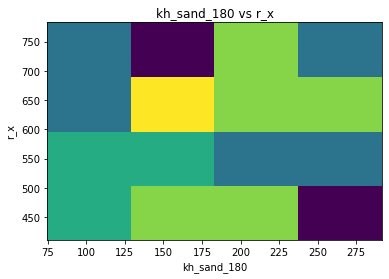

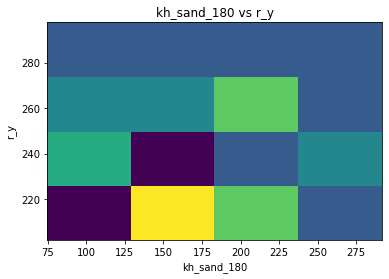

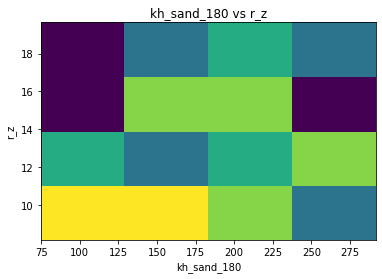

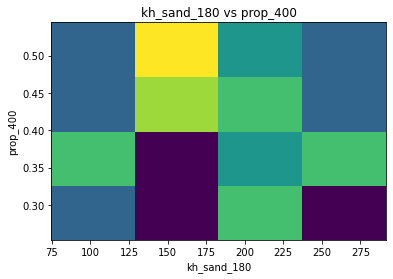

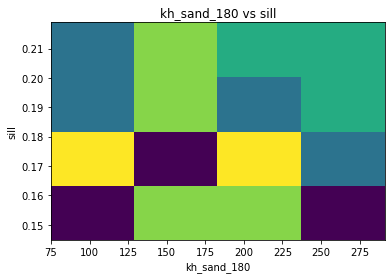

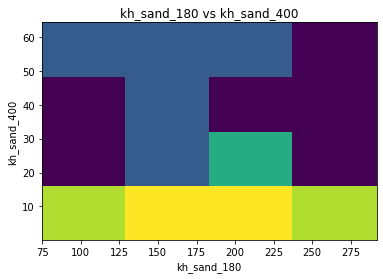

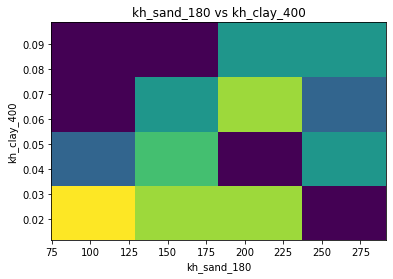

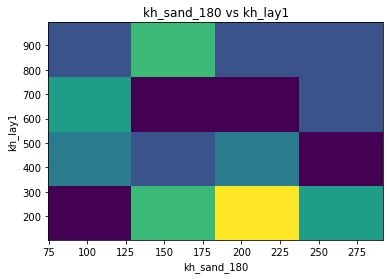

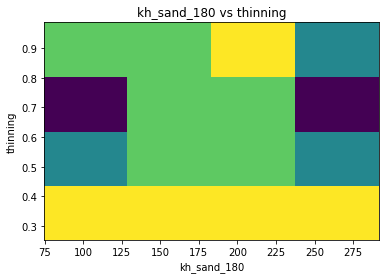

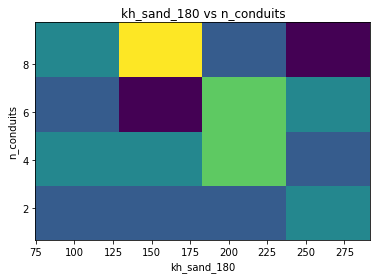

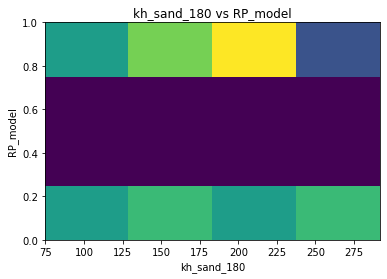

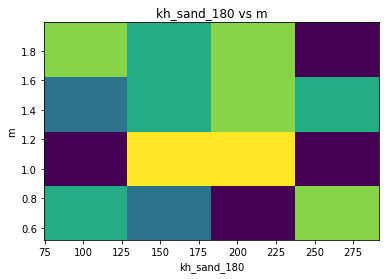

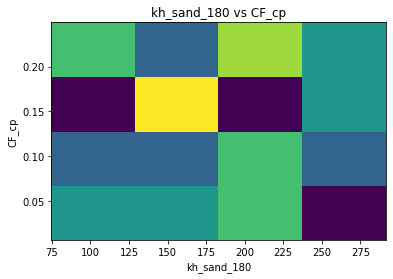

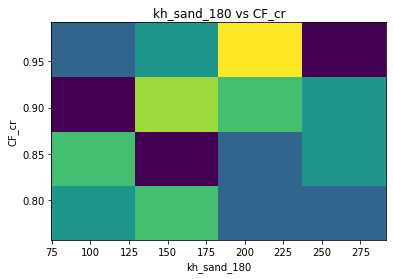

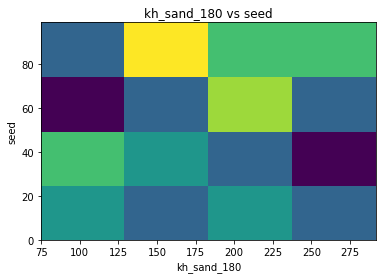

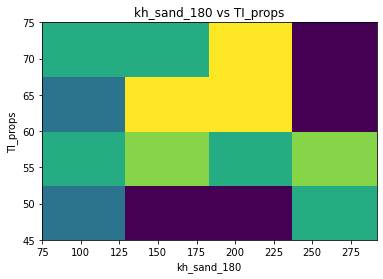

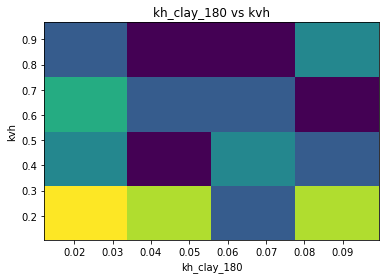

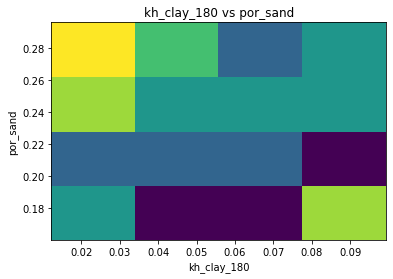

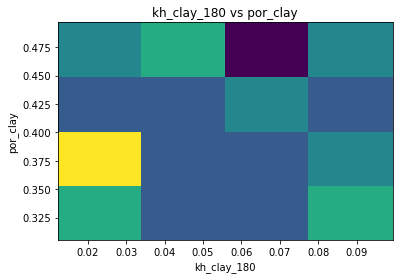

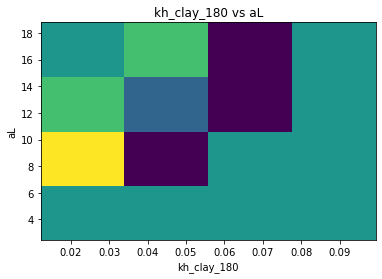

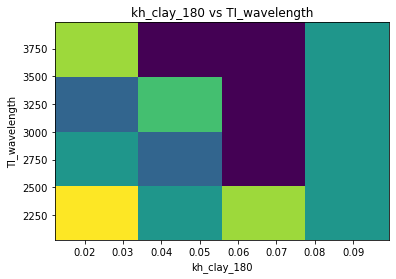

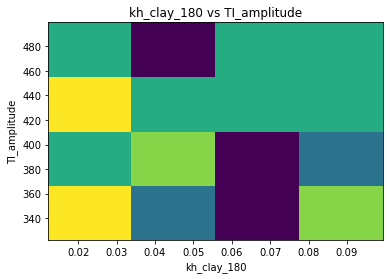

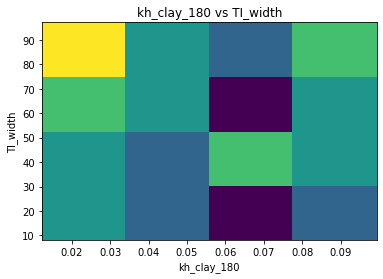

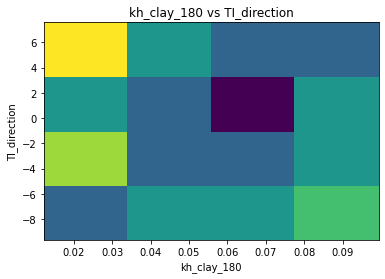

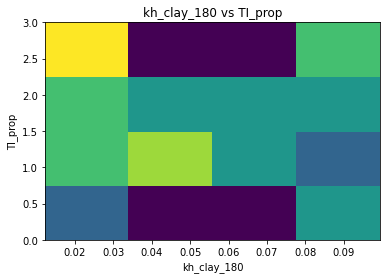

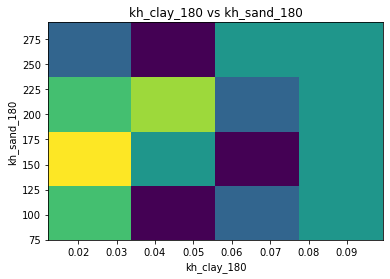

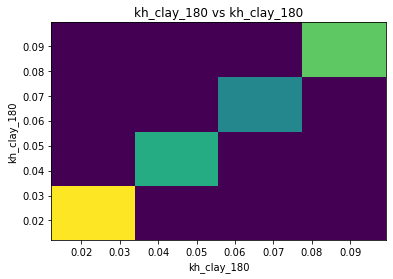

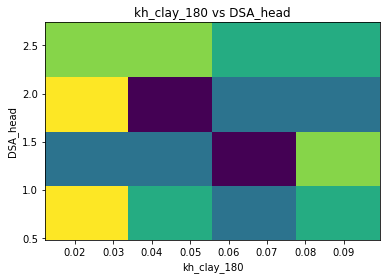

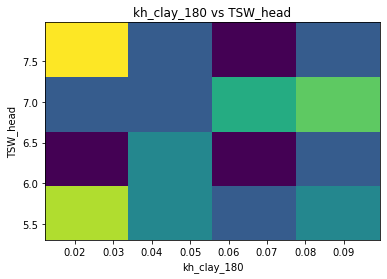

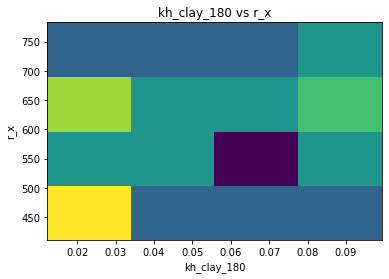

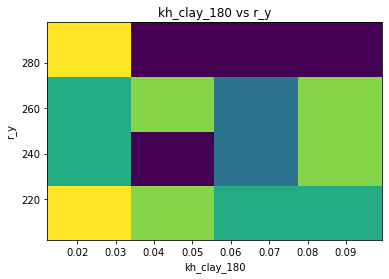

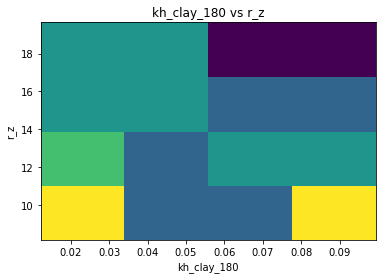

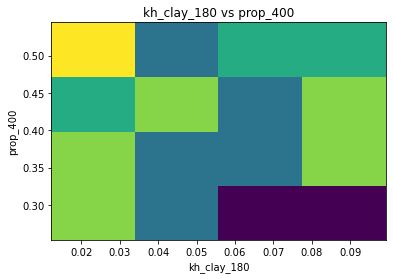

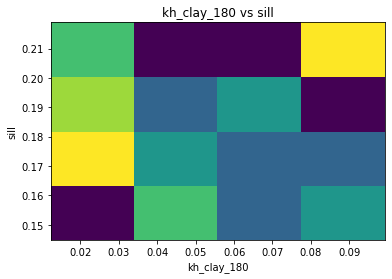

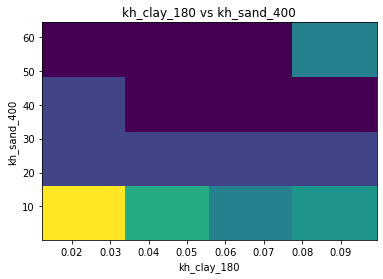

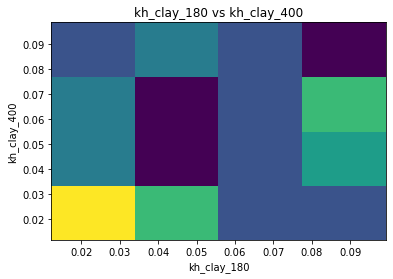

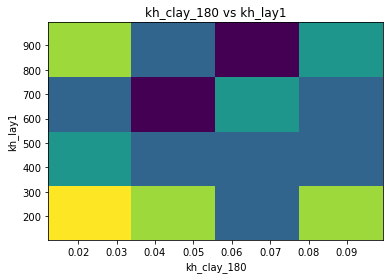

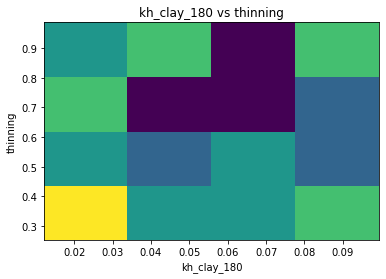

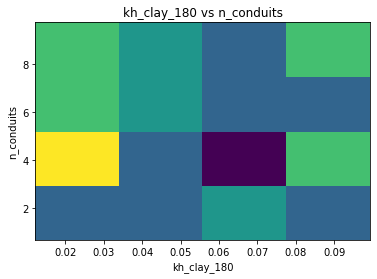

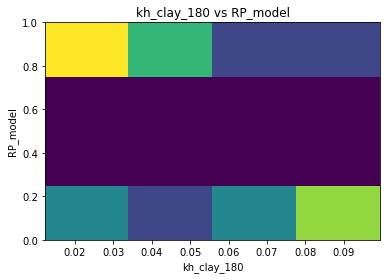

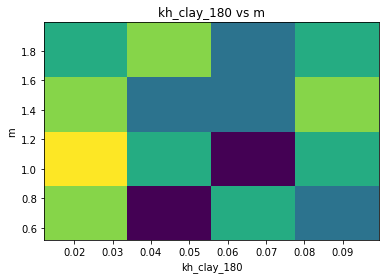

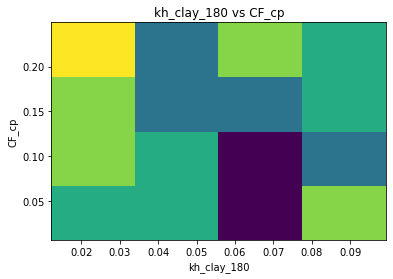

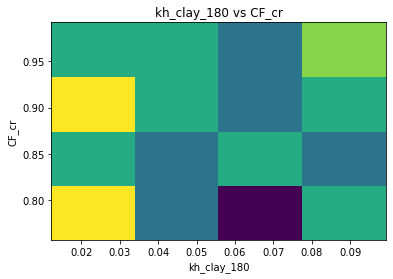

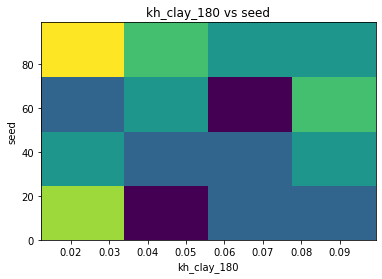

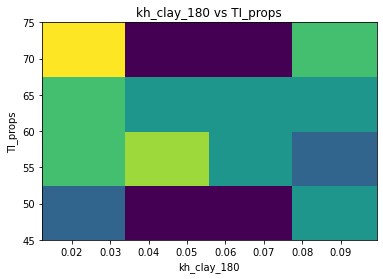

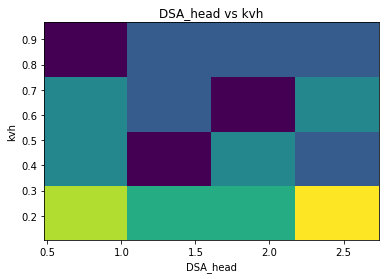

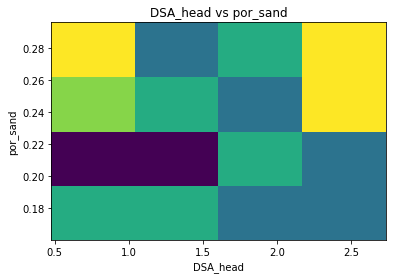

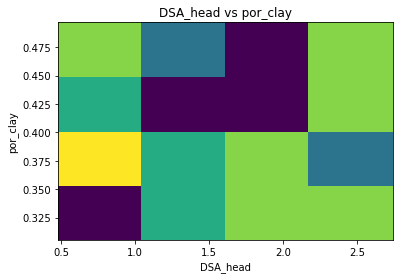

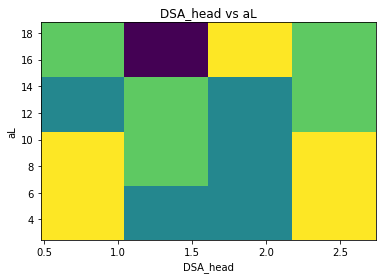

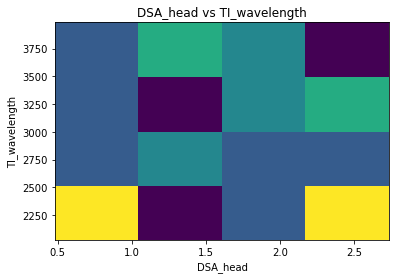

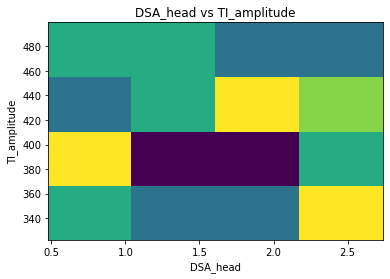

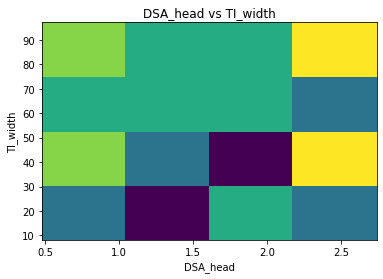

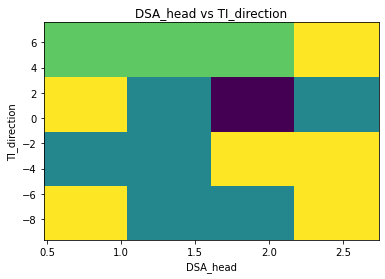

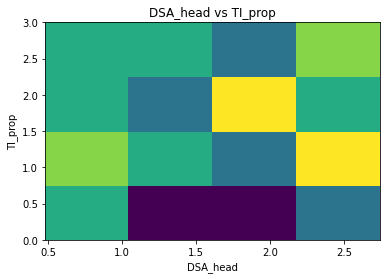

KeyboardInterrupt: 

In [8]:
import matplotlib.colors as mcolors
gamma=.7
for j,(k,v) in enumerate(varlist.items()):
    for i,(k2,v2) in enumerate(varlist.items()):
        plt.figure()
        ax = plt.gca()
        ax.hist2d(v[its][failed],v2[its][failed],norm=mcolors.PowerNorm(gamma),bins=4)
        plt.title('{} vs {}'.format(k,k2))
        plt.xlabel(k)
        plt.ylabel(k2)
        plt.show()

In [4]:
len(varlist.keys())

29